In [1]:
from scipy import ndimage
import pandas as pd
import numpy as np
from numpy import genfromtxt
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [2]:
from matplotlib.colors import LinearSegmentedColormap

cm_data = [[0.2081, 0.1663, 0.5292], [0.2116238095, 0.1897809524, 0.5776761905], 
 [0.212252381, 0.2137714286, 0.6269714286], [0.2081, 0.2386, 0.6770857143], 
 [0.1959047619, 0.2644571429, 0.7279], [0.1707285714, 0.2919380952, 
  0.779247619], [0.1252714286, 0.3242428571, 0.8302714286], 
 [0.0591333333, 0.3598333333, 0.8683333333], [0.0116952381, 0.3875095238, 
  0.8819571429], [0.0059571429, 0.4086142857, 0.8828428571], 
 [0.0165142857, 0.4266, 0.8786333333], [0.032852381, 0.4430428571, 
  0.8719571429], [0.0498142857, 0.4585714286, 0.8640571429], 
 [0.0629333333, 0.4736904762, 0.8554380952], [0.0722666667, 0.4886666667, 
  0.8467], [0.0779428571, 0.5039857143, 0.8383714286], 
 [0.079347619, 0.5200238095, 0.8311809524], [0.0749428571, 0.5375428571, 
  0.8262714286], [0.0640571429, 0.5569857143, 0.8239571429], 
 [0.0487714286, 0.5772238095, 0.8228285714], [0.0343428571, 0.5965809524, 
  0.819852381], [0.0265, 0.6137, 0.8135], [0.0238904762, 0.6286619048, 
  0.8037619048], [0.0230904762, 0.6417857143, 0.7912666667], 
 [0.0227714286, 0.6534857143, 0.7767571429], [0.0266619048, 0.6641952381, 
  0.7607190476], [0.0383714286, 0.6742714286, 0.743552381], 
 [0.0589714286, 0.6837571429, 0.7253857143], 
 [0.0843, 0.6928333333, 0.7061666667], [0.1132952381, 0.7015, 0.6858571429], 
 [0.1452714286, 0.7097571429, 0.6646285714], [0.1801333333, 0.7176571429, 
  0.6424333333], [0.2178285714, 0.7250428571, 0.6192619048], 
 [0.2586428571, 0.7317142857, 0.5954285714], [0.3021714286, 0.7376047619, 
  0.5711857143], [0.3481666667, 0.7424333333, 0.5472666667], 
 [0.3952571429, 0.7459, 0.5244428571], [0.4420095238, 0.7480809524, 
  0.5033142857], [0.4871238095, 0.7490619048, 0.4839761905], 
 [0.5300285714, 0.7491142857, 0.4661142857], [0.5708571429, 0.7485190476, 
  0.4493904762], [0.609852381, 0.7473142857, 0.4336857143], 
 [0.6473, 0.7456, 0.4188], [0.6834190476, 0.7434761905, 0.4044333333], 
 [0.7184095238, 0.7411333333, 0.3904761905], 
 [0.7524857143, 0.7384, 0.3768142857], [0.7858428571, 0.7355666667, 
  0.3632714286], [0.8185047619, 0.7327333333, 0.3497904762], 
 [0.8506571429, 0.7299, 0.3360285714], [0.8824333333, 0.7274333333, 0.3217], 
 [0.9139333333, 0.7257857143, 0.3062761905], [0.9449571429, 0.7261142857, 
  0.2886428571], [0.9738952381, 0.7313952381, 0.266647619], 
 [0.9937714286, 0.7454571429, 0.240347619], [0.9990428571, 0.7653142857, 
  0.2164142857], [0.9955333333, 0.7860571429, 0.196652381], 
 [0.988, 0.8066, 0.1793666667], [0.9788571429, 0.8271428571, 0.1633142857], 
 [0.9697, 0.8481380952, 0.147452381], [0.9625857143, 0.8705142857, 0.1309], 
 [0.9588714286, 0.8949, 0.1132428571], [0.9598238095, 0.9218333333, 
  0.0948380952], [0.9661, 0.9514428571, 0.0755333333], 
 [0.9763, 0.9831, 0.0538]]

parula_map = LinearSegmentedColormap.from_list('parula', cm_data)

In [3]:
x1 = genfromtxt('data_magV_1.5.csv', delimiter=',')
x2 = genfromtxt('data_magV_1.6.csv', delimiter=',')
x3 = genfromtxt('data_magV_1.7.csv', delimiter=',')
x4 = genfromtxt('data_magV_1.8.csv', delimiter=',')
x5 = genfromtxt('data_magV_1.9.csv', delimiter=',')
x6 = genfromtxt('data_magV_2.1.csv', delimiter=',')
x7 = genfromtxt('data_magV_2.2.csv', delimiter=',')
x8 = genfromtxt('data_magV_2.3.csv', delimiter=',')
x9 = genfromtxt('data_magV_2.4.csv', delimiter=',')
x10 = genfromtxt('data_magV_2.5.csv', delimiter=',')
x11 = genfromtxt('data_magV_2.6.csv', delimiter=',')
x1 = x1.astype('float32')
x2 = x2.astype('float32')
x3 = x3.astype('float32')
x4 = x4.astype('float32')
x5 = x5.astype('float32')
x6 = x6.astype('float32')
x7 = x7.astype('float32')
x8 = x8.astype('float32')
x9 = x9.astype('float32')
x10 = x10.astype('float32')
x11 = x11.astype('float32')

x_train = np.vstack((x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11))
x_train = np.reshape(x_train, (11, 100, 100, 1))

x_test = genfromtxt('data_magV_2.0.csv', delimiter=',')
x_test = x_test.astype('float32')
x_test = np.reshape(x_test, (1, 100, 100, 1))

In [4]:
tsr_train = np.array([1.5, 1.6, 1.7, 1.8, 1.9, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6])
tsr_test = np.array([2.0])

tsr_train = np.reshape(tsr_train, (11, 1, 1, 1))
tsr_test = np.reshape(tsr_test, (1, 1, 1, 1))

In [5]:
input_img = tf.keras.Input(shape=(100, 100, 1), name='input_img')
input_tsr = tf.keras.Input(shape=(1, 1, 1), name='input_tsr')

x = tf.keras.layers.Conv2D(300, (5, 5), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(1e-05))(input_img)
x = tf.keras.layers.MaxPooling2D((5, 5), padding='same')(x)
x = tf.keras.layers.Conv2D(300, (5, 5), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(1e-05))(x)
encoded = tf.keras.layers.MaxPooling2D((4, 4), padding='same')(x)

reshape1 = tf.keras.layers.Reshape((encoded.shape[1]*encoded.shape[2]*encoded.shape[3], 1))(encoded)
reshape2 = tf.keras.layers.Reshape((input_tsr.shape[1]*input_tsr.shape[2]*input_tsr.shape[3], 1))(input_tsr)
concatt = tf.keras.layers.Concatenate(axis=1)([reshape1, reshape2])
flatten = tf.keras.layers.Flatten()(concatt)
out = tf.keras.layers.Dense(encoded.shape[1]*encoded.shape[2]*encoded.shape[3], activation='relu')(flatten)
reshape = tf.keras.layers.Reshape((encoded.shape[1], encoded.shape[2], encoded.shape[3]))(out)

x = tf.keras.layers.Conv2D(300, (5, 5), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(1e-05))(reshape)
x = tf.keras.layers.UpSampling2D((4, 4))(x)
x = tf.keras.layers.Conv2D(300, (5, 5), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(1e-05))(x)
x = tf.keras.layers.UpSampling2D((5, 5))(x)
decoded = tf.keras.layers.Conv2D(1, (5, 5), activation=None, padding='same')(x)

# 오토인코더 = 인코더 + 디코더
autoencoder = tf.keras.Model([input_img, input_tsr], decoded)

In [6]:
autoencoder.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_img (InputLayer)         [(None, 100, 100, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 100, 100, 30  7800        ['input_img[0][0]']              
                                0)                                                                
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 20, 20, 300)  0           ['conv2d[0][0]']                 
                                                                                              

In [7]:
autoencoder.compile(optimizer = tf.keras.optimizers.Adam(0.001),
                    loss = tf.keras.losses.MeanSquaredError(),
                    metrics=[tf.keras.metrics.MeanAbsoluteError(name="mae"),
                            tf.keras.metrics.MeanAbsolutePercentageError(name="mape"),
                            tf.keras.metrics.RootMeanSquaredError(name="rmse"),
                            tf.keras.metrics.MeanSquaredLogarithmicError(name="msle")])

In [8]:
history = autoencoder.fit([x_train, tsr_train], x_train, epochs=10000, shuffle=True)

Epoch 1/10000
1/1 [==============================] - 3s 3s/step - loss: 56.2526 - mae: 7.1320 - mape: 101.1689 - rmse: 7.4996 - msle: 4.2056
Epoch 2/10000
1/1 [==============================] - 0s 61ms/step - loss: 66743.6484 - mae: 241.2365 - mape: 4172.3257 - rmse: 258.3479 - msle: 11.9353
Epoch 3/10000
1/1 [==============================] - 0s 57ms/step - loss: 32.7819 - mae: 5.0806 - mape: 66.5378 - rmse: 5.7248 - msle: 1.1453
Epoch 4/10000
1/1 [==============================] - 0s 59ms/step - loss: 55.1525 - mae: 7.0462 - mape: 99.6411 - rmse: 7.4259 - msle: 4.1770
Epoch 5/10000
1/1 [==============================] - 0s 57ms/step - loss: 55.4054 - mae: 7.0647 - mape: 99.9507 - rmse: 7.4429 - msle: 4.2500
Epoch 6/10000
1/1 [==============================] - 0s 59ms/step - loss: 55.3040 - mae: 7.0583 - mape: 99.8605 - rmse: 7.4360 - msle: 4.2230
Epoch 7/10000
1/1 [==============================] - 0s 59ms/step - loss: 55.0076 - mae: 7.0402 - mape: 99.6198 - rmse: 7.4161 - msle: 4.15

1/1 [==============================] - 0s 57ms/step - loss: 0.6126 - mae: 0.6153 - mape: 10.3811 - rmse: 0.7765 - msle: 0.0125
Epoch 116/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.6012 - mae: 0.6051 - mape: 10.0279 - rmse: 0.7692 - msle: 0.0120
Epoch 117/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.5964 - mae: 0.6016 - mape: 9.9414 - rmse: 0.7660 - msle: 0.0119
Epoch 118/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.5953 - mae: 0.6045 - mape: 10.1634 - rmse: 0.7654 - msle: 0.0121
Epoch 119/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.5902 - mae: 0.5951 - mape: 9.7343 - rmse: 0.7620 - msle: 0.0116
Epoch 120/10000
1/1 [==============================] - 0s 60ms/step - loss: 0.5798 - mae: 0.5938 - mape: 9.9388 - rmse: 0.7551 - msle: 0.0117
Epoch 121/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.5704 - mae: 0.5852 - mape: 9.6940 - rmse: 0.7489 - msle: 0.0114
Epoch 122/10000
1/1

1/1 [==============================] - 0s 57ms/step - loss: 0.3356 - mae: 0.4116 - mape: 6.9510 - rmse: 0.5711 - msle: 0.0071
Epoch 230/10000
1/1 [==============================] - 0s 60ms/step - loss: 0.3173 - mae: 0.3926 - mape: 6.6287 - rmse: 0.5548 - msle: 0.0067
Epoch 231/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.3501 - mae: 0.4250 - mape: 6.7887 - rmse: 0.5837 - msle: 0.0070
Epoch 232/10000
1/1 [==============================] - 0s 62ms/step - loss: 0.3219 - mae: 0.3987 - mape: 6.7022 - rmse: 0.5589 - msle: 0.0068
Epoch 233/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.3166 - mae: 0.3935 - mape: 6.5818 - rmse: 0.5542 - msle: 0.0067
Epoch 234/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.3371 - mae: 0.4116 - mape: 6.6472 - rmse: 0.5724 - msle: 0.0068
Epoch 235/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.3138 - mae: 0.3901 - mape: 6.5698 - rmse: 0.5517 - msle: 0.0067
Epoch 236/10000
1/1 [=

1/1 [==============================] - 0s 57ms/step - loss: 0.2920 - mae: 0.3907 - mape: 6.5324 - rmse: 0.5317 - msle: 0.0060
Epoch 344/10000
1/1 [==============================] - 0s 60ms/step - loss: 0.3291 - mae: 0.4263 - mape: 6.6835 - rmse: 0.5655 - msle: 0.0064
Epoch 345/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.3548 - mae: 0.4523 - mape: 7.5033 - rmse: 0.5878 - msle: 0.0070
Epoch 346/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.4055 - mae: 0.4983 - mape: 7.6743 - rmse: 0.6294 - msle: 0.0076
Epoch 347/10000
1/1 [==============================] - 0s 61ms/step - loss: 0.3772 - mae: 0.4736 - mape: 7.7393 - rmse: 0.6065 - msle: 0.0072
Epoch 348/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.3507 - mae: 0.4482 - mape: 6.9626 - rmse: 0.5843 - msle: 0.0067
Epoch 349/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.2830 - mae: 0.3807 - mape: 6.4143 - rmse: 0.5231 - msle: 0.0059
Epoch 350/10000
1/1 [=

1/1 [==============================] - 0s 60ms/step - loss: 0.2946 - mae: 0.4055 - mape: 6.4366 - rmse: 0.5342 - msle: 0.0059
Epoch 458/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.2965 - mae: 0.4135 - mape: 6.8551 - rmse: 0.5360 - msle: 0.0059
Epoch 459/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.3164 - mae: 0.4299 - mape: 6.6054 - rmse: 0.5542 - msle: 0.0059
Epoch 460/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.2980 - mae: 0.4165 - mape: 6.7518 - rmse: 0.5374 - msle: 0.0057
Epoch 461/10000
1/1 [==============================] - 0s 60ms/step - loss: 0.2894 - mae: 0.4032 - mape: 6.3287 - rmse: 0.5292 - msle: 0.0056
Epoch 462/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.2542 - mae: 0.3671 - mape: 6.1571 - rmse: 0.4950 - msle: 0.0052
Epoch 463/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.2288 - mae: 0.3334 - mape: 5.3811 - rmse: 0.4686 - msle: 0.0046
Epoch 464/10000
1/1 [=

1/1 [==============================] - 0s 59ms/step - loss: 0.1906 - mae: 0.3091 - mape: 5.1901 - rmse: 0.4260 - msle: 0.0040
Epoch 572/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.2179 - mae: 0.3395 - mape: 5.3788 - rmse: 0.4569 - msle: 0.0043
Epoch 573/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.2285 - mae: 0.3574 - mape: 5.9476 - rmse: 0.4684 - msle: 0.0047
Epoch 574/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.2292 - mae: 0.3538 - mape: 5.5928 - rmse: 0.4691 - msle: 0.0045
Epoch 575/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.2038 - mae: 0.3265 - mape: 5.4506 - rmse: 0.4411 - msle: 0.0042
Epoch 576/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.1832 - mae: 0.2973 - mape: 4.8723 - rmse: 0.4172 - msle: 0.0038
Epoch 577/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.1750 - mae: 0.2864 - mape: 4.7781 - rmse: 0.4073 - msle: 0.0037
Epoch 578/10000
1/1 [=

1/1 [==============================] - 0s 59ms/step - loss: 0.2145 - mae: 0.3499 - mape: 5.7605 - rmse: 0.4533 - msle: 0.0043
Epoch 686/10000
1/1 [==============================] - 0s 60ms/step - loss: 0.2330 - mae: 0.3692 - mape: 5.7587 - rmse: 0.4732 - msle: 0.0045
Epoch 687/10000
1/1 [==============================] - 0s 60ms/step - loss: 0.2310 - mae: 0.3692 - mape: 6.0826 - rmse: 0.4711 - msle: 0.0046
Epoch 688/10000
1/1 [==============================] - 0s 62ms/step - loss: 0.2402 - mae: 0.3772 - mape: 5.8908 - rmse: 0.4807 - msle: 0.0047
Epoch 689/10000
1/1 [==============================] - 0s 61ms/step - loss: 0.2203 - mae: 0.3569 - mape: 5.8614 - rmse: 0.4596 - msle: 0.0044
Epoch 690/10000
1/1 [==============================] - 0s 64ms/step - loss: 0.2074 - mae: 0.3389 - mape: 5.3103 - rmse: 0.4454 - msle: 0.0040
Epoch 691/10000
1/1 [==============================] - 0s 62ms/step - loss: 0.1814 - mae: 0.3087 - mape: 5.0997 - rmse: 0.4152 - msle: 0.0037
Epoch 692/10000
1/1 [=

1/1 [==============================] - 0s 59ms/step - loss: 0.5196 - mae: 0.6268 - mape: 9.3438 - rmse: 0.7146 - msle: 0.0093
Epoch 800/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.2387 - mae: 0.3819 - mape: 6.1152 - rmse: 0.4793 - msle: 0.0045
Epoch 801/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.1489 - mae: 0.2647 - mape: 4.4095 - rmse: 0.3741 - msle: 0.0031
Epoch 802/10000
1/1 [==============================] - 0s 63ms/step - loss: 0.2495 - mae: 0.3891 - mape: 5.9103 - rmse: 0.4904 - msle: 0.0046
Epoch 803/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.3225 - mae: 0.4685 - mape: 7.5379 - rmse: 0.5600 - msle: 0.0059
Epoch 804/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.3185 - mae: 0.4587 - mape: 7.0273 - rmse: 0.5563 - msle: 0.0060
Epoch 805/10000
1/1 [==============================] - 0s 61ms/step - loss: 0.1772 - mae: 0.3063 - mape: 5.1470 - rmse: 0.4102 - msle: 0.0037
Epoch 806/10000
1/1 [=

1/1 [==============================] - 0s 59ms/step - loss: 0.1395 - mae: 0.2557 - mape: 4.2994 - rmse: 0.3614 - msle: 0.0030
Epoch 914/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.1400 - mae: 0.2581 - mape: 4.2471 - rmse: 0.3621 - msle: 0.0029
Epoch 915/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.1406 - mae: 0.2574 - mape: 4.3490 - rmse: 0.3629 - msle: 0.0030
Epoch 916/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.1417 - mae: 0.2607 - mape: 4.2952 - rmse: 0.3644 - msle: 0.0030
Epoch 917/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.1422 - mae: 0.2597 - mape: 4.3874 - rmse: 0.3651 - msle: 0.0030
Epoch 918/10000
1/1 [==============================] - 0s 60ms/step - loss: 0.1434 - mae: 0.2638 - mape: 4.3202 - rmse: 0.3667 - msle: 0.0030
Epoch 919/10000
1/1 [==============================] - 0s 63ms/step - loss: 0.1444 - mae: 0.2636 - mape: 4.4168 - rmse: 0.3681 - msle: 0.0030
Epoch 920/10000
1/1 [=

1/1 [==============================] - 0s 58ms/step - loss: 0.1291 - mae: 0.2430 - mape: 4.0477 - rmse: 0.3468 - msle: 0.0027
Epoch 1028/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.1294 - mae: 0.2430 - mape: 4.0732 - rmse: 0.3473 - msle: 0.0027
Epoch 1029/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.1297 - mae: 0.2445 - mape: 4.0587 - rmse: 0.3478 - msle: 0.0027
Epoch 1030/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.1299 - mae: 0.2438 - mape: 4.0940 - rmse: 0.3480 - msle: 0.0028
Epoch 1031/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.1299 - mae: 0.2450 - mape: 4.0656 - rmse: 0.3479 - msle: 0.0027
Epoch 1032/10000
1/1 [==============================] - 0s 61ms/step - loss: 0.1295 - mae: 0.2433 - mape: 4.0831 - rmse: 0.3474 - msle: 0.0027
Epoch 1033/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.1291 - mae: 0.2436 - mape: 4.0484 - rmse: 0.3469 - msle: 0.0027
Epoch 1034/10000

1/1 [==============================] - 0s 62ms/step - loss: 0.1517 - mae: 0.2807 - mape: 4.6997 - rmse: 0.3781 - msle: 0.0031
Epoch 1142/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.1472 - mae: 0.2771 - mape: 4.4749 - rmse: 0.3722 - msle: 0.0030
Epoch 1143/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.1369 - mae: 0.2581 - mape: 4.3130 - rmse: 0.3580 - msle: 0.0029
Epoch 1144/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.1295 - mae: 0.2477 - mape: 4.0538 - rmse: 0.3475 - msle: 0.0027
Epoch 1145/10000
1/1 [==============================] - 0s 60ms/step - loss: 0.1251 - mae: 0.2392 - mape: 3.9924 - rmse: 0.3412 - msle: 0.0026
Epoch 1146/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.1241 - mae: 0.2378 - mape: 3.9774 - rmse: 0.3397 - msle: 0.0026
Epoch 1147/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.1265 - mae: 0.2429 - mape: 4.0014 - rmse: 0.3432 - msle: 0.0026
Epoch 1148/10000

1/1 [==============================] - 0s 61ms/step - loss: 0.1204 - mae: 0.2341 - mape: 3.9213 - rmse: 0.3343 - msle: 0.0025
Epoch 1256/10000
1/1 [==============================] - 0s 61ms/step - loss: 0.1233 - mae: 0.2403 - mape: 3.9417 - rmse: 0.3386 - msle: 0.0025
Epoch 1257/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.1282 - mae: 0.2468 - mape: 4.1004 - rmse: 0.3458 - msle: 0.0026
Epoch 1258/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.1329 - mae: 0.2572 - mape: 4.1373 - rmse: 0.3526 - msle: 0.0027
Epoch 1259/10000
1/1 [==============================] - 0s 61ms/step - loss: 0.1353 - mae: 0.2585 - mape: 4.3001 - rmse: 0.3559 - msle: 0.0028
Epoch 1260/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.1384 - mae: 0.2660 - mape: 4.2967 - rmse: 0.3603 - msle: 0.0028
Epoch 1261/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.1379 - mae: 0.2623 - mape: 4.3984 - rmse: 0.3596 - msle: 0.0029
Epoch 1262/10000

1/1 [==============================] - 0s 58ms/step - loss: 0.1157 - mae: 0.2288 - mape: 3.8126 - rmse: 0.3273 - msle: 0.0024
Epoch 1370/10000
1/1 [==============================] - 0s 61ms/step - loss: 0.1158 - mae: 0.2286 - mape: 3.8179 - rmse: 0.3275 - msle: 0.0024
Epoch 1371/10000
1/1 [==============================] - 0s 60ms/step - loss: 0.1163 - mae: 0.2305 - mape: 3.8230 - rmse: 0.3283 - msle: 0.0024
Epoch 1372/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.1169 - mae: 0.2304 - mape: 3.8645 - rmse: 0.3291 - msle: 0.0025
Epoch 1373/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.1177 - mae: 0.2337 - mape: 3.8539 - rmse: 0.3304 - msle: 0.0024
Epoch 1374/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.1187 - mae: 0.2335 - mape: 3.9009 - rmse: 0.3319 - msle: 0.0025
Epoch 1375/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.1202 - mae: 0.2388 - mape: 3.9108 - rmse: 0.3341 - msle: 0.0025
Epoch 1376/10000

1/1 [==============================] - 0s 58ms/step - loss: 0.1164 - mae: 0.2346 - mape: 3.8470 - rmse: 0.3285 - msle: 0.0024
Epoch 1484/10000
1/1 [==============================] - 0s 61ms/step - loss: 0.1185 - mae: 0.2355 - mape: 3.9441 - rmse: 0.3318 - msle: 0.0025
Epoch 1485/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.1226 - mae: 0.2464 - mape: 4.0066 - rmse: 0.3379 - msle: 0.0025
Epoch 1486/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.1279 - mae: 0.2512 - mape: 4.2076 - rmse: 0.3456 - msle: 0.0026
Epoch 1487/10000
1/1 [==============================] - 0s 60ms/step - loss: 0.1383 - mae: 0.2710 - mape: 4.3448 - rmse: 0.3603 - msle: 0.0028
Epoch 1488/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.1506 - mae: 0.2867 - mape: 4.7646 - rmse: 0.3770 - msle: 0.0031
Epoch 1489/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.1759 - mae: 0.3248 - mape: 5.1074 - rmse: 0.4092 - msle: 0.0034
Epoch 1490/10000

1/1 [==============================] - 0s 62ms/step - loss: 0.1203 - mae: 0.2435 - mape: 3.9254 - rmse: 0.3346 - msle: 0.0024
Epoch 1598/10000
1/1 [==============================] - 0s 61ms/step - loss: 0.1191 - mae: 0.2389 - mape: 3.9685 - rmse: 0.3328 - msle: 0.0024
Epoch 1599/10000
1/1 [==============================] - 0s 63ms/step - loss: 0.1186 - mae: 0.2415 - mape: 3.9174 - rmse: 0.3321 - msle: 0.0024
Epoch 1600/10000
1/1 [==============================] - 0s 65ms/step - loss: 0.1176 - mae: 0.2357 - mape: 3.9478 - rmse: 0.3305 - msle: 0.0024
Epoch 1601/10000
1/1 [==============================] - 0s 64ms/step - loss: 0.1169 - mae: 0.2381 - mape: 3.8839 - rmse: 0.3295 - msle: 0.0024
Epoch 1602/10000
1/1 [==============================] - 0s 64ms/step - loss: 0.1159 - mae: 0.2330 - mape: 3.8949 - rmse: 0.3279 - msle: 0.0024
Epoch 1603/10000
1/1 [==============================] - 0s 64ms/step - loss: 0.1153 - mae: 0.2358 - mape: 3.8441 - rmse: 0.3270 - msle: 0.0023
Epoch 1604/10000

1/1 [==============================] - 0s 59ms/step - loss: 0.1134 - mae: 0.2303 - mape: 3.8453 - rmse: 0.3242 - msle: 0.0023
Epoch 1712/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.1143 - mae: 0.2359 - mape: 3.8323 - rmse: 0.3256 - msle: 0.0023
Epoch 1713/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.1143 - mae: 0.2318 - mape: 3.8551 - rmse: 0.3256 - msle: 0.0023
Epoch 1714/10000
1/1 [==============================] - 0s 56ms/step - loss: 0.1143 - mae: 0.2351 - mape: 3.8041 - rmse: 0.3257 - msle: 0.0023
Epoch 1715/10000
1/1 [==============================] - 0s 68ms/step - loss: 0.1135 - mae: 0.2305 - mape: 3.8367 - rmse: 0.3244 - msle: 0.0023
Epoch 1716/10000
1/1 [==============================] - 0s 65ms/step - loss: 0.1128 - mae: 0.2331 - mape: 3.7986 - rmse: 0.3234 - msle: 0.0023
Epoch 1717/10000
1/1 [==============================] - 0s 63ms/step - loss: 0.1117 - mae: 0.2278 - mape: 3.8002 - rmse: 0.3217 - msle: 0.0023
Epoch 1718/10000

1/1 [==============================] - 0s 64ms/step - loss: 0.1209 - mae: 0.2462 - mape: 4.0866 - rmse: 0.3358 - msle: 0.0025
Epoch 1826/10000
1/1 [==============================] - 0s 64ms/step - loss: 0.1088 - mae: 0.2252 - mape: 3.7135 - rmse: 0.3172 - msle: 0.0022
Epoch 1827/10000
1/1 [==============================] - 0s 61ms/step - loss: 0.1079 - mae: 0.2242 - mape: 3.6664 - rmse: 0.3158 - msle: 0.0022
Epoch 1828/10000
1/1 [==============================] - 0s 56ms/step - loss: 0.1168 - mae: 0.2388 - mape: 3.9786 - rmse: 0.3295 - msle: 0.0024
Epoch 1829/10000
1/1 [==============================] - 0s 55ms/step - loss: 0.1319 - mae: 0.2649 - mape: 4.2622 - rmse: 0.3517 - msle: 0.0026
Epoch 1830/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.1376 - mae: 0.2695 - mape: 4.4848 - rmse: 0.3597 - msle: 0.0028
Epoch 1831/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.1392 - mae: 0.2776 - mape: 4.3669 - rmse: 0.3620 - msle: 0.0027
Epoch 1832/10000

1/1 [==============================] - 0s 57ms/step - loss: 0.1032 - mae: 0.2154 - mape: 3.5742 - rmse: 0.3084 - msle: 0.0021
Epoch 1940/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.1028 - mae: 0.2153 - mape: 3.5658 - rmse: 0.3078 - msle: 0.0021
Epoch 1941/10000
1/1 [==============================] - 0s 56ms/step - loss: 0.1030 - mae: 0.2160 - mape: 3.5679 - rmse: 0.3081 - msle: 0.0021
Epoch 1942/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.1035 - mae: 0.2159 - mape: 3.5864 - rmse: 0.3089 - msle: 0.0021
Epoch 1943/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.1039 - mae: 0.2182 - mape: 3.5871 - rmse: 0.3096 - msle: 0.0021
Epoch 1944/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.1040 - mae: 0.2168 - mape: 3.6076 - rmse: 0.3097 - msle: 0.0021
Epoch 1945/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.1039 - mae: 0.2184 - mape: 3.5907 - rmse: 0.3095 - msle: 0.0021
Epoch 1946/10000

1/1 [==============================] - 0s 60ms/step - loss: 0.1017 - mae: 0.2161 - mape: 3.5590 - rmse: 0.3062 - msle: 0.0021
Epoch 2054/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.1019 - mae: 0.2143 - mape: 3.5744 - rmse: 0.3064 - msle: 0.0021
Epoch 2055/10000
1/1 [==============================] - 0s 65ms/step - loss: 0.1018 - mae: 0.2169 - mape: 3.5735 - rmse: 0.3063 - msle: 0.0021
Epoch 2056/10000
1/1 [==============================] - 0s 62ms/step - loss: 0.1018 - mae: 0.2142 - mape: 3.5711 - rmse: 0.3062 - msle: 0.0021
Epoch 2057/10000
1/1 [==============================] - 0s 63ms/step - loss: 0.1018 - mae: 0.2166 - mape: 3.5595 - rmse: 0.3063 - msle: 0.0021
Epoch 2058/10000
1/1 [==============================] - 0s 62ms/step - loss: 0.1020 - mae: 0.2146 - mape: 3.5749 - rmse: 0.3066 - msle: 0.0021
Epoch 2059/10000
1/1 [==============================] - 0s 62ms/step - loss: 0.1025 - mae: 0.2175 - mape: 3.5644 - rmse: 0.3074 - msle: 0.0021
Epoch 2060/10000

1/1 [==============================] - 0s 63ms/step - loss: 0.1032 - mae: 0.2217 - mape: 3.6098 - rmse: 0.3087 - msle: 0.0021
Epoch 2168/10000
1/1 [==============================] - 0s 63ms/step - loss: 0.1051 - mae: 0.2215 - mape: 3.6817 - rmse: 0.3118 - msle: 0.0021
Epoch 2169/10000
1/1 [==============================] - 0s 63ms/step - loss: 0.1084 - mae: 0.2306 - mape: 3.7180 - rmse: 0.3171 - msle: 0.0022
Epoch 2170/10000
1/1 [==============================] - 0s 62ms/step - loss: 0.1122 - mae: 0.2339 - mape: 3.8615 - rmse: 0.3229 - msle: 0.0023
Epoch 2171/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.1188 - mae: 0.2491 - mape: 3.9376 - rmse: 0.3330 - msle: 0.0023
Epoch 2172/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.1252 - mae: 0.2565 - mape: 4.1730 - rmse: 0.3425 - msle: 0.0024
Epoch 2173/10000
1/1 [==============================] - 0s 56ms/step - loss: 0.1376 - mae: 0.2790 - mape: 4.3543 - rmse: 0.3602 - msle: 0.0026
Epoch 2174/10000

1/1 [==============================] - 0s 58ms/step - loss: 0.1169 - mae: 0.2444 - mape: 3.8623 - rmse: 0.3303 - msle: 0.0022
Epoch 2282/10000
1/1 [==============================] - 0s 61ms/step - loss: 0.1456 - mae: 0.2889 - mape: 4.7390 - rmse: 0.3711 - msle: 0.0029
Epoch 2283/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.1626 - mae: 0.3129 - mape: 4.9608 - rmse: 0.3934 - msle: 0.0032
Epoch 2284/10000
1/1 [==============================] - 0s 60ms/step - loss: 0.1332 - mae: 0.2656 - mape: 4.3837 - rmse: 0.3541 - msle: 0.0027
Epoch 2285/10000
1/1 [==============================] - 0s 71ms/step - loss: 0.1076 - mae: 0.2286 - mape: 3.6760 - rmse: 0.3160 - msle: 0.0021
Epoch 2286/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.1027 - mae: 0.2180 - mape: 3.5760 - rmse: 0.3081 - msle: 0.0021
Epoch 2287/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.1172 - mae: 0.2430 - mape: 3.9919 - rmse: 0.3308 - msle: 0.0023
Epoch 2288/10000

1/1 [==============================] - 0s 59ms/step - loss: 0.1312 - mae: 0.2633 - mape: 4.4052 - rmse: 0.3514 - msle: 0.0027
Epoch 2396/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.1255 - mae: 0.2520 - mape: 4.0362 - rmse: 0.3432 - msle: 0.0025
Epoch 2397/10000
1/1 [==============================] - 0s 65ms/step - loss: 0.1045 - mae: 0.2222 - mape: 3.6583 - rmse: 0.3111 - msle: 0.0021
Epoch 2398/10000
1/1 [==============================] - 0s 60ms/step - loss: 0.1030 - mae: 0.2189 - mape: 3.6226 - rmse: 0.3086 - msle: 0.0021
Epoch 2399/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.1074 - mae: 0.2308 - mape: 3.7350 - rmse: 0.3157 - msle: 0.0021
Epoch 2400/10000
1/1 [==============================] - 0s 56ms/step - loss: 0.1169 - mae: 0.2454 - mape: 3.9178 - rmse: 0.3304 - msle: 0.0022
Epoch 2401/10000
1/1 [==============================] - 0s 56ms/step - loss: 0.1147 - mae: 0.2415 - mape: 3.8054 - rmse: 0.3271 - msle: 0.0022
Epoch 2402/10000

1/1 [==============================] - 0s 57ms/step - loss: 0.0943 - mae: 0.2055 - mape: 3.4134 - rmse: 0.2944 - msle: 0.0019
Epoch 2510/10000
1/1 [==============================] - 0s 61ms/step - loss: 0.0950 - mae: 0.2091 - mape: 3.4302 - rmse: 0.2956 - msle: 0.0019
Epoch 2511/10000
1/1 [==============================] - 0s 62ms/step - loss: 0.0958 - mae: 0.2081 - mape: 3.4598 - rmse: 0.2969 - msle: 0.0020
Epoch 2512/10000
1/1 [==============================] - 0s 60ms/step - loss: 0.0967 - mae: 0.2134 - mape: 3.4798 - rmse: 0.2985 - msle: 0.0019
Epoch 2513/10000
1/1 [==============================] - 0s 60ms/step - loss: 0.0976 - mae: 0.2112 - mape: 3.5088 - rmse: 0.2998 - msle: 0.0020
Epoch 2514/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.0988 - mae: 0.2168 - mape: 3.5184 - rmse: 0.3019 - msle: 0.0020
Epoch 2515/10000
1/1 [==============================] - 0s 63ms/step - loss: 0.0999 - mae: 0.2155 - mape: 3.5708 - rmse: 0.3037 - msle: 0.0020
Epoch 2516/10000

1/1 [==============================] - 0s 61ms/step - loss: 0.0930 - mae: 0.2061 - mape: 3.3852 - rmse: 0.2924 - msle: 0.0019
Epoch 2624/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.0930 - mae: 0.2039 - mape: 3.3873 - rmse: 0.2922 - msle: 0.0019
Epoch 2625/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.0930 - mae: 0.2066 - mape: 3.3860 - rmse: 0.2923 - msle: 0.0019
Epoch 2626/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.0932 - mae: 0.2045 - mape: 3.3877 - rmse: 0.2926 - msle: 0.0019
Epoch 2627/10000
1/1 [==============================] - 0s 62ms/step - loss: 0.0934 - mae: 0.2074 - mape: 3.3920 - rmse: 0.2930 - msle: 0.0019
Epoch 2628/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.0939 - mae: 0.2055 - mape: 3.4120 - rmse: 0.2938 - msle: 0.0019
Epoch 2629/10000
1/1 [==============================] - 0s 61ms/step - loss: 0.0946 - mae: 0.2095 - mape: 3.4168 - rmse: 0.2950 - msle: 0.0019
Epoch 2630/10000

1/1 [==============================] - 0s 57ms/step - loss: 0.0905 - mae: 0.2016 - mape: 3.3255 - rmse: 0.2882 - msle: 0.0018
Epoch 2738/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.0904 - mae: 0.2012 - mape: 3.3281 - rmse: 0.2880 - msle: 0.0018
Epoch 2739/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.0906 - mae: 0.2007 - mape: 3.3278 - rmse: 0.2884 - msle: 0.0019
Epoch 2740/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.0908 - mae: 0.2027 - mape: 3.3423 - rmse: 0.2887 - msle: 0.0018
Epoch 2741/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.0913 - mae: 0.2019 - mape: 3.3539 - rmse: 0.2895 - msle: 0.0019
Epoch 2742/10000
1/1 [==============================] - 0s 56ms/step - loss: 0.0921 - mae: 0.2055 - mape: 3.3605 - rmse: 0.2908 - msle: 0.0019
Epoch 2743/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.0930 - mae: 0.2050 - mape: 3.3972 - rmse: 0.2925 - msle: 0.0019
Epoch 2744/10000

1/1 [==============================] - 0s 58ms/step - loss: 0.1187 - mae: 0.2519 - mape: 4.1020 - rmse: 0.3336 - msle: 0.0023
Epoch 2852/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.1473 - mae: 0.2957 - mape: 4.4943 - rmse: 0.3741 - msle: 0.0027
Epoch 2853/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.1464 - mae: 0.2952 - mape: 4.6696 - rmse: 0.3728 - msle: 0.0027
Epoch 2854/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.1359 - mae: 0.2824 - mape: 4.3742 - rmse: 0.3585 - msle: 0.0025
Epoch 2855/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.1096 - mae: 0.2356 - mape: 3.8897 - rmse: 0.3196 - msle: 0.0022
Epoch 2856/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.0939 - mae: 0.2087 - mape: 3.4153 - rmse: 0.2941 - msle: 0.0019
Epoch 2857/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.0920 - mae: 0.2060 - mape: 3.3581 - rmse: 0.2909 - msle: 0.0018
Epoch 2858/10000

1/1 [==============================] - 0s 58ms/step - loss: 0.0898 - mae: 0.2006 - mape: 3.3251 - rmse: 0.2872 - msle: 0.0018
Epoch 2966/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.0907 - mae: 0.2037 - mape: 3.3255 - rmse: 0.2888 - msle: 0.0018
Epoch 2967/10000
1/1 [==============================] - 0s 56ms/step - loss: 0.0911 - mae: 0.2029 - mape: 3.3748 - rmse: 0.2894 - msle: 0.0019
Epoch 2968/10000
1/1 [==============================] - 0s 56ms/step - loss: 0.0911 - mae: 0.2070 - mape: 3.3827 - rmse: 0.2895 - msle: 0.0018
Epoch 2969/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.0905 - mae: 0.2018 - mape: 3.3430 - rmse: 0.2884 - msle: 0.0018
Epoch 2970/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.0893 - mae: 0.2020 - mape: 3.3066 - rmse: 0.2864 - msle: 0.0018
Epoch 2971/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.0887 - mae: 0.1989 - mape: 3.3002 - rmse: 0.2853 - msle: 0.0018
Epoch 2972/10000

1/1 [==============================] - 0s 56ms/step - loss: 0.0901 - mae: 0.2056 - mape: 3.3364 - rmse: 0.2879 - msle: 0.0018
Epoch 3080/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.0881 - mae: 0.1986 - mape: 3.2851 - rmse: 0.2843 - msle: 0.0018
Epoch 3081/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.0868 - mae: 0.1978 - mape: 3.2523 - rmse: 0.2821 - msle: 0.0018
Epoch 3082/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.0863 - mae: 0.1958 - mape: 3.2409 - rmse: 0.2812 - msle: 0.0018
Epoch 3083/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.0864 - mae: 0.1956 - mape: 3.2373 - rmse: 0.2813 - msle: 0.0018
Epoch 3084/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.0868 - mae: 0.1980 - mape: 3.2575 - rmse: 0.2820 - msle: 0.0018
Epoch 3085/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.0875 - mae: 0.1975 - mape: 3.2793 - rmse: 0.2834 - msle: 0.0018
Epoch 3086/10000

1/1 [==============================] - 0s 56ms/step - loss: 0.0974 - mae: 0.2161 - mape: 3.5473 - rmse: 0.3005 - msle: 0.0019
Epoch 3194/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.0899 - mae: 0.2041 - mape: 3.3313 - rmse: 0.2876 - msle: 0.0018
Epoch 3195/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.0876 - mae: 0.1985 - mape: 3.2728 - rmse: 0.2836 - msle: 0.0018
Epoch 3196/10000
1/1 [==============================] - 0s 56ms/step - loss: 0.0905 - mae: 0.2034 - mape: 3.3551 - rmse: 0.2888 - msle: 0.0018
Epoch 3197/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.0945 - mae: 0.2140 - mape: 3.4500 - rmse: 0.2955 - msle: 0.0019
Epoch 3198/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.0953 - mae: 0.2126 - mape: 3.5503 - rmse: 0.2968 - msle: 0.0019
Epoch 3199/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.0921 - mae: 0.2092 - mape: 3.4148 - rmse: 0.2915 - msle: 0.0018
Epoch 3200/10000

1/1 [==============================] - 0s 59ms/step - loss: 0.0841 - mae: 0.1934 - mape: 3.1915 - rmse: 0.2775 - msle: 0.0017
Epoch 3308/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.0840 - mae: 0.1926 - mape: 3.1889 - rmse: 0.2774 - msle: 0.0017
Epoch 3309/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.0839 - mae: 0.1930 - mape: 3.1890 - rmse: 0.2773 - msle: 0.0017
Epoch 3310/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.0839 - mae: 0.1927 - mape: 3.1897 - rmse: 0.2771 - msle: 0.0017
Epoch 3311/10000
1/1 [==============================] - 0s 56ms/step - loss: 0.0838 - mae: 0.1925 - mape: 3.1847 - rmse: 0.2770 - msle: 0.0017
Epoch 3312/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.0838 - mae: 0.1927 - mape: 3.1895 - rmse: 0.2770 - msle: 0.0017
Epoch 3313/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.0838 - mae: 0.1924 - mape: 3.1849 - rmse: 0.2770 - msle: 0.0017
Epoch 3314/10000

1/1 [==============================] - 0s 57ms/step - loss: 0.0901 - mae: 0.2087 - mape: 3.3689 - rmse: 0.2883 - msle: 0.0018
Epoch 3422/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.0918 - mae: 0.2082 - mape: 3.4380 - rmse: 0.2912 - msle: 0.0018
Epoch 3423/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.0947 - mae: 0.2173 - mape: 3.4656 - rmse: 0.2961 - msle: 0.0018
Epoch 3424/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.0969 - mae: 0.2181 - mape: 3.5791 - rmse: 0.2999 - msle: 0.0019
Epoch 3425/10000
1/1 [==============================] - 0s 56ms/step - loss: 0.1011 - mae: 0.2289 - mape: 3.6195 - rmse: 0.3068 - msle: 0.0019
Epoch 3426/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.1038 - mae: 0.2309 - mape: 3.7783 - rmse: 0.3111 - msle: 0.0020
Epoch 3427/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.1098 - mae: 0.2450 - mape: 3.8567 - rmse: 0.3206 - msle: 0.0021
Epoch 3428/10000

1/1 [==============================] - 0s 57ms/step - loss: 0.0847 - mae: 0.1951 - mape: 3.2372 - rmse: 0.2789 - msle: 0.0017
Epoch 3536/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.0852 - mae: 0.1991 - mape: 3.2480 - rmse: 0.2798 - msle: 0.0017
Epoch 3537/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.0857 - mae: 0.1969 - mape: 3.2809 - rmse: 0.2807 - msle: 0.0017
Epoch 3538/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.0864 - mae: 0.2018 - mape: 3.2843 - rmse: 0.2819 - msle: 0.0017
Epoch 3539/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.0872 - mae: 0.2002 - mape: 3.3176 - rmse: 0.2834 - msle: 0.0018
Epoch 3540/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.0887 - mae: 0.2075 - mape: 3.3481 - rmse: 0.2861 - msle: 0.0017
Epoch 3541/10000
1/1 [==============================] - 0s 60ms/step - loss: 0.0902 - mae: 0.2062 - mape: 3.4128 - rmse: 0.2886 - msle: 0.0018
Epoch 3542/10000

1/1 [==============================] - 0s 58ms/step - loss: 0.0822 - mae: 0.1924 - mape: 3.1595 - rmse: 0.2745 - msle: 0.0017
Epoch 3650/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.0833 - mae: 0.1943 - mape: 3.1693 - rmse: 0.2766 - msle: 0.0017
Epoch 3651/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.0899 - mae: 0.2065 - mape: 3.3875 - rmse: 0.2882 - msle: 0.0018
Epoch 3652/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.0982 - mae: 0.2261 - mape: 3.5825 - rmse: 0.3022 - msle: 0.0019
Epoch 3653/10000
1/1 [==============================] - 0s 56ms/step - loss: 0.1017 - mae: 0.2294 - mape: 3.7705 - rmse: 0.3080 - msle: 0.0020
Epoch 3654/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.1028 - mae: 0.2335 - mape: 3.7186 - rmse: 0.3097 - msle: 0.0020
Epoch 3655/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.0970 - mae: 0.2196 - mape: 3.6292 - rmse: 0.3003 - msle: 0.0019
Epoch 3656/10000

1/1 [==============================] - 0s 57ms/step - loss: 0.0850 - mae: 0.1972 - mape: 3.2930 - rmse: 0.2798 - msle: 0.0017
Epoch 3764/10000
1/1 [==============================] - 0s 56ms/step - loss: 0.0863 - mae: 0.2035 - mape: 3.3076 - rmse: 0.2820 - msle: 0.0017
Epoch 3765/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.0866 - mae: 0.2006 - mape: 3.3262 - rmse: 0.2826 - msle: 0.0017
Epoch 3766/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.0876 - mae: 0.2057 - mape: 3.3052 - rmse: 0.2843 - msle: 0.0017
Epoch 3767/10000
1/1 [==============================] - 0s 56ms/step - loss: 0.0878 - mae: 0.2032 - mape: 3.3504 - rmse: 0.2847 - msle: 0.0018
Epoch 3768/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.0884 - mae: 0.2077 - mape: 3.3363 - rmse: 0.2857 - msle: 0.0017
Epoch 3769/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.0883 - mae: 0.2042 - mape: 3.3793 - rmse: 0.2856 - msle: 0.0018
Epoch 3770/10000

1/1 [==============================] - 0s 57ms/step - loss: 0.0794 - mae: 0.1882 - mape: 3.1030 - rmse: 0.2697 - msle: 0.0016
Epoch 3878/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.0790 - mae: 0.1862 - mape: 3.0899 - rmse: 0.2688 - msle: 0.0016
Epoch 3879/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.0787 - mae: 0.1862 - mape: 3.0841 - rmse: 0.2684 - msle: 0.0016
Epoch 3880/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.0789 - mae: 0.1869 - mape: 3.0900 - rmse: 0.2687 - msle: 0.0016
Epoch 3881/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.0791 - mae: 0.1864 - mape: 3.0999 - rmse: 0.2691 - msle: 0.0016
Epoch 3882/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.0794 - mae: 0.1886 - mape: 3.1124 - rmse: 0.2696 - msle: 0.0016
Epoch 3883/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.0796 - mae: 0.1873 - mape: 3.1119 - rmse: 0.2700 - msle: 0.0016
Epoch 3884/10000

1/1 [==============================] - 0s 58ms/step - loss: 0.0906 - mae: 0.2116 - mape: 3.4714 - rmse: 0.2899 - msle: 0.0018
Epoch 3992/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.0884 - mae: 0.2109 - mape: 3.3988 - rmse: 0.2861 - msle: 0.0017
Epoch 3993/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.0853 - mae: 0.1999 - mape: 3.3364 - rmse: 0.2805 - msle: 0.0017
Epoch 3994/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.0828 - mae: 0.1980 - mape: 3.2214 - rmse: 0.2760 - msle: 0.0017
Epoch 3995/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.0806 - mae: 0.1902 - mape: 3.1605 - rmse: 0.2721 - msle: 0.0016
Epoch 3996/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.0792 - mae: 0.1897 - mape: 3.1026 - rmse: 0.2694 - msle: 0.0016
Epoch 3997/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.0782 - mae: 0.1856 - mape: 3.0789 - rmse: 0.2675 - msle: 0.0016
Epoch 3998/10000

1/1 [==============================] - 0s 59ms/step - loss: 0.0762 - mae: 0.1829 - mape: 3.0323 - rmse: 0.2639 - msle: 0.0015
Epoch 4106/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.0763 - mae: 0.1826 - mape: 3.0312 - rmse: 0.2640 - msle: 0.0015
Epoch 4107/10000
1/1 [==============================] - 0s 56ms/step - loss: 0.0766 - mae: 0.1843 - mape: 3.0482 - rmse: 0.2646 - msle: 0.0016
Epoch 4108/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.0769 - mae: 0.1837 - mape: 3.0599 - rmse: 0.2652 - msle: 0.0016
Epoch 4109/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.0772 - mae: 0.1865 - mape: 3.0714 - rmse: 0.2658 - msle: 0.0016
Epoch 4110/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.0778 - mae: 0.1856 - mape: 3.0878 - rmse: 0.2669 - msle: 0.0016
Epoch 4111/10000
1/1 [==============================] - 0s 56ms/step - loss: 0.0789 - mae: 0.1907 - mape: 3.1085 - rmse: 0.2691 - msle: 0.0016
Epoch 4112/10000

1/1 [==============================] - 0s 58ms/step - loss: 0.0860 - mae: 0.2068 - mape: 3.3142 - rmse: 0.2821 - msle: 0.0017
Epoch 4220/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.0871 - mae: 0.2060 - mape: 3.4077 - rmse: 0.2840 - msle: 0.0017
Epoch 4221/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.0884 - mae: 0.2125 - mape: 3.4031 - rmse: 0.2863 - msle: 0.0017
Epoch 4222/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.0877 - mae: 0.2075 - mape: 3.4234 - rmse: 0.2851 - msle: 0.0017
Epoch 4223/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.0873 - mae: 0.2094 - mape: 3.3556 - rmse: 0.2843 - msle: 0.0017
Epoch 4224/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.0855 - mae: 0.2023 - mape: 3.3461 - rmse: 0.2812 - msle: 0.0017
Epoch 4225/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.0841 - mae: 0.2029 - mape: 3.2582 - rmse: 0.2786 - msle: 0.0016
Epoch 4226/10000

1/1 [==============================] - 0s 61ms/step - loss: 0.1680 - mae: 0.3362 - mape: 5.0584 - rmse: 0.4020 - msle: 0.0030
Epoch 4334/10000
1/1 [==============================] - 0s 61ms/step - loss: 0.1519 - mae: 0.3149 - mape: 4.9657 - rmse: 0.3815 - msle: 0.0027
Epoch 4335/10000
1/1 [==============================] - 0s 60ms/step - loss: 0.1422 - mae: 0.3010 - mape: 4.5643 - rmse: 0.3685 - msle: 0.0025
Epoch 4336/10000
1/1 [==============================] - 0s 62ms/step - loss: 0.1117 - mae: 0.2533 - mape: 4.0749 - rmse: 0.3245 - msle: 0.0021
Epoch 4337/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.0899 - mae: 0.2152 - mape: 3.4207 - rmse: 0.2890 - msle: 0.0017
Epoch 4338/10000
1/1 [==============================] - 0s 56ms/step - loss: 0.0765 - mae: 0.1844 - mape: 3.0520 - rmse: 0.2648 - msle: 0.0015
Epoch 4339/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.0766 - mae: 0.1846 - mape: 3.0632 - rmse: 0.2649 - msle: 0.0015
Epoch 4340/10000

1/1 [==============================] - 0s 58ms/step - loss: 0.0742 - mae: 0.1808 - mape: 3.0076 - rmse: 0.2606 - msle: 0.0015
Epoch 4448/10000
1/1 [==============================] - 0s 63ms/step - loss: 0.0746 - mae: 0.1841 - mape: 3.0175 - rmse: 0.2613 - msle: 0.0015
Epoch 4449/10000
1/1 [==============================] - 0s 63ms/step - loss: 0.0751 - mae: 0.1826 - mape: 3.0381 - rmse: 0.2623 - msle: 0.0015
Epoch 4450/10000
1/1 [==============================] - 0s 63ms/step - loss: 0.0761 - mae: 0.1880 - mape: 3.0729 - rmse: 0.2642 - msle: 0.0015
Epoch 4451/10000
1/1 [==============================] - 0s 62ms/step - loss: 0.0776 - mae: 0.1877 - mape: 3.1265 - rmse: 0.2670 - msle: 0.0016
Epoch 4452/10000
1/1 [==============================] - 0s 60ms/step - loss: 0.0801 - mae: 0.1971 - mape: 3.1923 - rmse: 0.2717 - msle: 0.0016
Epoch 4453/10000
1/1 [==============================] - 0s 60ms/step - loss: 0.0837 - mae: 0.2009 - mape: 3.3298 - rmse: 0.2783 - msle: 0.0017
Epoch 4454/10000

1/1 [==============================] - 0s 62ms/step - loss: 0.0741 - mae: 0.1807 - mape: 2.9911 - rmse: 0.2604 - msle: 0.0015
Epoch 4562/10000
1/1 [==============================] - 0s 60ms/step - loss: 0.0741 - mae: 0.1815 - mape: 2.9885 - rmse: 0.2605 - msle: 0.0015
Epoch 4563/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.0764 - mae: 0.1852 - mape: 3.0880 - rmse: 0.2649 - msle: 0.0016
Epoch 4564/10000
1/1 [==============================] - 0s 60ms/step - loss: 0.0783 - mae: 0.1926 - mape: 3.1246 - rmse: 0.2685 - msle: 0.0016
Epoch 4565/10000
1/1 [==============================] - 0s 62ms/step - loss: 0.0794 - mae: 0.1929 - mape: 3.2216 - rmse: 0.2703 - msle: 0.0016
Epoch 4566/10000
1/1 [==============================] - 0s 62ms/step - loss: 0.0793 - mae: 0.1959 - mape: 3.1888 - rmse: 0.2702 - msle: 0.0016
Epoch 4567/10000
1/1 [==============================] - 0s 63ms/step - loss: 0.0775 - mae: 0.1882 - mape: 3.1111 - rmse: 0.2668 - msle: 0.0016
Epoch 4568/10000

1/1 [==============================] - 0s 62ms/step - loss: 0.0729 - mae: 0.1827 - mape: 3.0020 - rmse: 0.2584 - msle: 0.0015
Epoch 4676/10000
1/1 [==============================] - 0s 61ms/step - loss: 0.0732 - mae: 0.1801 - mape: 3.0025 - rmse: 0.2589 - msle: 0.0015
Epoch 4677/10000
1/1 [==============================] - 0s 60ms/step - loss: 0.0738 - mae: 0.1843 - mape: 3.0158 - rmse: 0.2600 - msle: 0.0015
Epoch 4678/10000
1/1 [==============================] - 0s 60ms/step - loss: 0.0745 - mae: 0.1828 - mape: 3.0434 - rmse: 0.2614 - msle: 0.0015
Epoch 4679/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.0756 - mae: 0.1889 - mape: 3.0696 - rmse: 0.2635 - msle: 0.0015
Epoch 4680/10000
1/1 [==============================] - 0s 62ms/step - loss: 0.0769 - mae: 0.1883 - mape: 3.1219 - rmse: 0.2660 - msle: 0.0015
Epoch 4681/10000
1/1 [==============================] - 0s 62ms/step - loss: 0.0792 - mae: 0.1970 - mape: 3.1718 - rmse: 0.2701 - msle: 0.0016
Epoch 4682/10000

1/1 [==============================] - 0s 62ms/step - loss: 0.0716 - mae: 0.1777 - mape: 2.9571 - rmse: 0.2559 - msle: 0.0014
Epoch 4790/10000
1/1 [==============================] - 0s 62ms/step - loss: 0.0724 - mae: 0.1821 - mape: 2.9833 - rmse: 0.2574 - msle: 0.0014
Epoch 4791/10000
1/1 [==============================] - 0s 61ms/step - loss: 0.0729 - mae: 0.1803 - mape: 3.0014 - rmse: 0.2583 - msle: 0.0015
Epoch 4792/10000
1/1 [==============================] - 0s 60ms/step - loss: 0.0736 - mae: 0.1852 - mape: 3.0214 - rmse: 0.2598 - msle: 0.0015
Epoch 4793/10000
1/1 [==============================] - 0s 60ms/step - loss: 0.0740 - mae: 0.1829 - mape: 3.0409 - rmse: 0.2606 - msle: 0.0015
Epoch 4794/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.0743 - mae: 0.1869 - mape: 3.0433 - rmse: 0.2612 - msle: 0.0015
Epoch 4795/10000
1/1 [==============================] - 0s 62ms/step - loss: 0.0745 - mae: 0.1842 - mape: 3.0553 - rmse: 0.2615 - msle: 0.0015
Epoch 4796/10000

1/1 [==============================] - 0s 62ms/step - loss: 0.0790 - mae: 0.1952 - mape: 3.2008 - rmse: 0.2701 - msle: 0.0016
Epoch 4904/10000
1/1 [==============================] - 0s 60ms/step - loss: 0.0806 - mae: 0.2018 - mape: 3.2048 - rmse: 0.2731 - msle: 0.0015
Epoch 4905/10000
1/1 [==============================] - 0s 60ms/step - loss: 0.0816 - mae: 0.2008 - mape: 3.2949 - rmse: 0.2747 - msle: 0.0016
Epoch 4906/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.0843 - mae: 0.2097 - mape: 3.3362 - rmse: 0.2796 - msle: 0.0016
Epoch 4907/10000
1/1 [==============================] - 0s 62ms/step - loss: 0.0864 - mae: 0.2110 - mape: 3.4654 - rmse: 0.2834 - msle: 0.0017
Epoch 4908/10000
1/1 [==============================] - 0s 61ms/step - loss: 0.0912 - mae: 0.2232 - mape: 3.5213 - rmse: 0.2918 - msle: 0.0017
Epoch 4909/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.0949 - mae: 0.2265 - mape: 3.6894 - rmse: 0.2980 - msle: 0.0018
Epoch 4910/10000

1/1 [==============================] - 0s 63ms/step - loss: 0.0900 - mae: 0.2217 - mape: 3.4471 - rmse: 0.2898 - msle: 0.0017
Epoch 5018/10000
1/1 [==============================] - 0s 62ms/step - loss: 0.0826 - mae: 0.2044 - mape: 3.3373 - rmse: 0.2767 - msle: 0.0016
Epoch 5019/10000
1/1 [==============================] - 0s 61ms/step - loss: 0.0776 - mae: 0.1956 - mape: 3.1677 - rmse: 0.2676 - msle: 0.0015
Epoch 5020/10000
1/1 [==============================] - 0s 60ms/step - loss: 0.0737 - mae: 0.1826 - mape: 3.0504 - rmse: 0.2601 - msle: 0.0015
Epoch 5021/10000
1/1 [==============================] - 0s 60ms/step - loss: 0.0705 - mae: 0.1776 - mape: 2.9136 - rmse: 0.2539 - msle: 0.0014
Epoch 5022/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.0689 - mae: 0.1736 - mape: 2.8781 - rmse: 0.2508 - msle: 0.0014
Epoch 5023/10000
1/1 [==============================] - 0s 61ms/step - loss: 0.0693 - mae: 0.1748 - mape: 2.9050 - rmse: 0.2516 - msle: 0.0014
Epoch 5024/10000

1/1 [==============================] - 0s 60ms/step - loss: 0.0688 - mae: 0.1736 - mape: 2.8879 - rmse: 0.2506 - msle: 0.0014
Epoch 5132/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.0685 - mae: 0.1743 - mape: 2.8793 - rmse: 0.2501 - msle: 0.0014
Epoch 5133/10000
1/1 [==============================] - 0s 63ms/step - loss: 0.0683 - mae: 0.1729 - mape: 2.8744 - rmse: 0.2497 - msle: 0.0014
Epoch 5134/10000
1/1 [==============================] - 0s 63ms/step - loss: 0.0680 - mae: 0.1728 - mape: 2.8645 - rmse: 0.2491 - msle: 0.0014
Epoch 5135/10000
1/1 [==============================] - 0s 63ms/step - loss: 0.0680 - mae: 0.1729 - mape: 2.8660 - rmse: 0.2491 - msle: 0.0014
Epoch 5136/10000
1/1 [==============================] - 0s 60ms/step - loss: 0.0680 - mae: 0.1723 - mape: 2.8617 - rmse: 0.2492 - msle: 0.0014
Epoch 5137/10000
1/1 [==============================] - 0s 60ms/step - loss: 0.0681 - mae: 0.1732 - mape: 2.8642 - rmse: 0.2493 - msle: 0.0014
Epoch 5138/10000

1/1 [==============================] - 0s 63ms/step - loss: 0.0760 - mae: 0.1934 - mape: 3.0873 - rmse: 0.2648 - msle: 0.0015
Epoch 5246/10000
1/1 [==============================] - 0s 63ms/step - loss: 0.0851 - mae: 0.2099 - mape: 3.4375 - rmse: 0.2814 - msle: 0.0017
Epoch 5247/10000
1/1 [==============================] - 0s 62ms/step - loss: 0.0942 - mae: 0.2300 - mape: 3.6216 - rmse: 0.2971 - msle: 0.0018
Epoch 5248/10000
1/1 [==============================] - 0s 62ms/step - loss: 0.0954 - mae: 0.2296 - mape: 3.7497 - rmse: 0.2992 - msle: 0.0018
Epoch 5249/10000
1/1 [==============================] - 0s 61ms/step - loss: 0.0940 - mae: 0.2289 - mape: 3.5703 - rmse: 0.2969 - msle: 0.0018
Epoch 5250/10000
1/1 [==============================] - 0s 60ms/step - loss: 0.0857 - mae: 0.2117 - mape: 3.4311 - rmse: 0.2824 - msle: 0.0016
Epoch 5251/10000
1/1 [==============================] - 0s 60ms/step - loss: 0.0781 - mae: 0.1979 - mape: 3.1328 - rmse: 0.2687 - msle: 0.0015
Epoch 5252/10000

1/1 [==============================] - 0s 59ms/step - loss: 0.0692 - mae: 0.1789 - mape: 2.9205 - rmse: 0.2518 - msle: 0.0014
Epoch 5360/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.0680 - mae: 0.1737 - mape: 2.8856 - rmse: 0.2493 - msle: 0.0014
Epoch 5361/10000
1/1 [==============================] - 0s 60ms/step - loss: 0.0670 - mae: 0.1735 - mape: 2.8462 - rmse: 0.2474 - msle: 0.0013
Epoch 5362/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.0663 - mae: 0.1701 - mape: 2.8246 - rmse: 0.2458 - msle: 0.0013
Epoch 5363/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.0660 - mae: 0.1700 - mape: 2.8195 - rmse: 0.2453 - msle: 0.0013
Epoch 5364/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.0662 - mae: 0.1709 - mape: 2.8224 - rmse: 0.2458 - msle: 0.0013
Epoch 5365/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.0666 - mae: 0.1708 - mape: 2.8406 - rmse: 0.2466 - msle: 0.0013
Epoch 5366/10000

1/1 [==============================] - 0s 59ms/step - loss: 0.0892 - mae: 0.2221 - mape: 3.6371 - rmse: 0.2888 - msle: 0.0017
Epoch 5474/10000
1/1 [==============================] - 0s 60ms/step - loss: 0.0775 - mae: 0.1972 - mape: 3.1307 - rmse: 0.2679 - msle: 0.0015
Epoch 5475/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.0706 - mae: 0.1784 - mape: 2.9768 - rmse: 0.2546 - msle: 0.0014
Epoch 5476/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.0672 - mae: 0.1734 - mape: 2.8711 - rmse: 0.2479 - msle: 0.0014
Epoch 5477/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.0683 - mae: 0.1766 - mape: 2.8821 - rmse: 0.2501 - msle: 0.0014
Epoch 5478/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.0720 - mae: 0.1844 - mape: 3.0867 - rmse: 0.2574 - msle: 0.0015
Epoch 5479/10000
1/1 [==============================] - 0s 60ms/step - loss: 0.0776 - mae: 0.1981 - mape: 3.1927 - rmse: 0.2680 - msle: 0.0015
Epoch 5480/10000

1/1 [==============================] - 0s 60ms/step - loss: 0.0758 - mae: 0.1943 - mape: 3.1492 - rmse: 0.2648 - msle: 0.0015
Epoch 5588/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.0742 - mae: 0.1911 - mape: 3.0329 - rmse: 0.2617 - msle: 0.0014
Epoch 5589/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.0713 - mae: 0.1819 - mape: 3.0127 - rmse: 0.2561 - msle: 0.0014
Epoch 5590/10000
1/1 [==============================] - 0s 60ms/step - loss: 0.0693 - mae: 0.1807 - mape: 2.9401 - rmse: 0.2521 - msle: 0.0014
Epoch 5591/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.0684 - mae: 0.1763 - mape: 2.9489 - rmse: 0.2503 - msle: 0.0014
Epoch 5592/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.0667 - mae: 0.1748 - mape: 2.8800 - rmse: 0.2470 - msle: 0.0013
Epoch 5593/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.0652 - mae: 0.1689 - mape: 2.8105 - rmse: 0.2440 - msle: 0.0013
Epoch 5594/10000

1/1 [==============================] - 0s 58ms/step - loss: 0.0692 - mae: 0.1744 - mape: 2.8997 - rmse: 0.2520 - msle: 0.0014
Epoch 5702/10000
1/1 [==============================] - 0s 60ms/step - loss: 0.0689 - mae: 0.1742 - mape: 2.8841 - rmse: 0.2514 - msle: 0.0014
Epoch 5703/10000
1/1 [==============================] - 0s 61ms/step - loss: 0.0687 - mae: 0.1740 - mape: 2.8824 - rmse: 0.2510 - msle: 0.0014
Epoch 5704/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.0688 - mae: 0.1739 - mape: 2.8896 - rmse: 0.2512 - msle: 0.0014
Epoch 5705/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.0687 - mae: 0.1743 - mape: 2.8816 - rmse: 0.2510 - msle: 0.0014
Epoch 5706/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.0685 - mae: 0.1734 - mape: 2.8815 - rmse: 0.2507 - msle: 0.0014
Epoch 5707/10000
1/1 [==============================] - 0s 60ms/step - loss: 0.0683 - mae: 0.1735 - mape: 2.8756 - rmse: 0.2502 - msle: 0.0014
Epoch 5708/10000

1/1 [==============================] - 0s 60ms/step - loss: 0.1194 - mae: 0.2730 - mape: 4.3444 - rmse: 0.3372 - msle: 0.0022
Epoch 5816/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.0972 - mae: 0.2371 - mape: 3.6625 - rmse: 0.3026 - msle: 0.0018
Epoch 5817/10000
1/1 [==============================] - 0s 56ms/step - loss: 0.0743 - mae: 0.1894 - mape: 3.1263 - rmse: 0.2621 - msle: 0.0015
Epoch 5818/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.0653 - mae: 0.1691 - mape: 2.7967 - rmse: 0.2442 - msle: 0.0013
Epoch 5819/10000
1/1 [==============================] - 0s 61ms/step - loss: 0.0698 - mae: 0.1827 - mape: 2.9608 - rmse: 0.2533 - msle: 0.0014
Epoch 5820/10000
1/1 [==============================] - 0s 60ms/step - loss: 0.0811 - mae: 0.2040 - mape: 3.3693 - rmse: 0.2748 - msle: 0.0016
Epoch 5821/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.0934 - mae: 0.2289 - mape: 3.5876 - rmse: 0.2963 - msle: 0.0018
Epoch 5822/10000

1/1 [==============================] - 0s 59ms/step - loss: 0.0634 - mae: 0.1657 - mape: 2.7500 - rmse: 0.2404 - msle: 0.0013
Epoch 5930/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.0636 - mae: 0.1659 - mape: 2.7675 - rmse: 0.2409 - msle: 0.0013
Epoch 5931/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.0640 - mae: 0.1686 - mape: 2.7802 - rmse: 0.2418 - msle: 0.0013
Epoch 5932/10000
1/1 [==============================] - 0s 62ms/step - loss: 0.0645 - mae: 0.1678 - mape: 2.7962 - rmse: 0.2427 - msle: 0.0013
Epoch 5933/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.0649 - mae: 0.1711 - mape: 2.8069 - rmse: 0.2436 - msle: 0.0013
Epoch 5934/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.0653 - mae: 0.1695 - mape: 2.8339 - rmse: 0.2444 - msle: 0.0013
Epoch 5935/10000
1/1 [==============================] - 0s 60ms/step - loss: 0.0656 - mae: 0.1726 - mape: 2.8303 - rmse: 0.2449 - msle: 0.0013
Epoch 5936/10000

1/1 [==============================] - 0s 58ms/step - loss: 0.0858 - mae: 0.2183 - mape: 3.4247 - rmse: 0.2832 - msle: 0.0016
Epoch 6044/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.0846 - mae: 0.2139 - mape: 3.4873 - rmse: 0.2812 - msle: 0.0016
Epoch 6045/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.0849 - mae: 0.2163 - mape: 3.3853 - rmse: 0.2818 - msle: 0.0016
Epoch 6046/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.0820 - mae: 0.2086 - mape: 3.3876 - rmse: 0.2765 - msle: 0.0016
Epoch 6047/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.0805 - mae: 0.2080 - mape: 3.2622 - rmse: 0.2739 - msle: 0.0015
Epoch 6048/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.0768 - mae: 0.1975 - mape: 3.2356 - rmse: 0.2669 - msle: 0.0015
Epoch 6049/10000
1/1 [==============================] - 0s 62ms/step - loss: 0.0742 - mae: 0.1942 - mape: 3.0995 - rmse: 0.2620 - msle: 0.0014
Epoch 6050/10000

1/1 [==============================] - 0s 60ms/step - loss: 0.0784 - mae: 0.2016 - mape: 3.3054 - rmse: 0.2700 - msle: 0.0015
Epoch 6158/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.0787 - mae: 0.2047 - mape: 3.2401 - rmse: 0.2707 - msle: 0.0015
Epoch 6159/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.0767 - mae: 0.1979 - mape: 3.2431 - rmse: 0.2668 - msle: 0.0015
Epoch 6160/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.0753 - mae: 0.1967 - mape: 3.1124 - rmse: 0.2643 - msle: 0.0014
Epoch 6161/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.0726 - mae: 0.1885 - mape: 3.0981 - rmse: 0.2590 - msle: 0.0014
Epoch 6162/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.0705 - mae: 0.1876 - mape: 3.0109 - rmse: 0.2549 - msle: 0.0014
Epoch 6163/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.0679 - mae: 0.1783 - mape: 2.9545 - rmse: 0.2499 - msle: 0.0014
Epoch 6164/10000

1/1 [==============================] - 0s 57ms/step - loss: 0.0780 - mae: 0.2042 - mape: 3.2030 - rmse: 0.2694 - msle: 0.0015
Epoch 6272/10000
1/1 [==============================] - 0s 61ms/step - loss: 0.0793 - mae: 0.2039 - mape: 3.3339 - rmse: 0.2717 - msle: 0.0015
Epoch 6273/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.0814 - mae: 0.2106 - mape: 3.3200 - rmse: 0.2756 - msle: 0.0015
Epoch 6274/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.0809 - mae: 0.2075 - mape: 3.3756 - rmse: 0.2746 - msle: 0.0016
Epoch 6275/10000
1/1 [==============================] - 0s 60ms/step - loss: 0.0819 - mae: 0.2114 - mape: 3.2937 - rmse: 0.2766 - msle: 0.0015
Epoch 6276/10000
1/1 [==============================] - 0s 61ms/step - loss: 0.0796 - mae: 0.2049 - mape: 3.3363 - rmse: 0.2724 - msle: 0.0015
Epoch 6277/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.0792 - mae: 0.2068 - mape: 3.2675 - rmse: 0.2716 - msle: 0.0015
Epoch 6278/10000

1/1 [==============================] - 0s 62ms/step - loss: 0.0704 - mae: 0.1868 - mape: 2.9947 - rmse: 0.2551 - msle: 0.0014
Epoch 6386/10000
1/1 [==============================] - 0s 56ms/step - loss: 0.0783 - mae: 0.2008 - mape: 3.2859 - rmse: 0.2700 - msle: 0.0015
Epoch 6387/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.0853 - mae: 0.2180 - mape: 3.3983 - rmse: 0.2827 - msle: 0.0016
Epoch 6388/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.0855 - mae: 0.2182 - mape: 3.5163 - rmse: 0.2831 - msle: 0.0016
Epoch 6389/10000
1/1 [==============================] - 0s 60ms/step - loss: 0.0850 - mae: 0.2184 - mape: 3.3829 - rmse: 0.2822 - msle: 0.0016
Epoch 6390/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.0781 - mae: 0.2021 - mape: 3.2889 - rmse: 0.2697 - msle: 0.0015
Epoch 6391/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.0721 - mae: 0.1907 - mape: 3.0409 - rmse: 0.2583 - msle: 0.0014
Epoch 6392/10000

1/1 [==============================] - 0s 59ms/step - loss: 0.1076 - mae: 0.2382 - mape: 3.9783 - rmse: 0.3196 - msle: 0.0023
Epoch 6500/10000
1/1 [==============================] - 0s 60ms/step - loss: 0.1012 - mae: 0.2268 - mape: 3.7237 - rmse: 0.3095 - msle: 0.0021
Epoch 6501/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.0978 - mae: 0.2236 - mape: 3.6869 - rmse: 0.3039 - msle: 0.0021
Epoch 6502/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.1046 - mae: 0.2358 - mape: 3.8940 - rmse: 0.3149 - msle: 0.0021
Epoch 6503/10000
1/1 [==============================] - 0s 60ms/step - loss: 0.1093 - mae: 0.2415 - mape: 3.8360 - rmse: 0.3223 - msle: 0.0022
Epoch 6504/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.0934 - mae: 0.2170 - mape: 3.6646 - rmse: 0.2966 - msle: 0.0020
Epoch 6505/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.0868 - mae: 0.2075 - mape: 3.4431 - rmse: 0.2853 - msle: 0.0018
Epoch 6506/10000

1/1 [==============================] - 0s 59ms/step - loss: 0.0899 - mae: 0.2261 - mape: 3.6463 - rmse: 0.2906 - msle: 0.0017
Epoch 6614/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.0903 - mae: 0.2262 - mape: 3.5104 - rmse: 0.2914 - msle: 0.0017
Epoch 6615/10000
1/1 [==============================] - 0s 60ms/step - loss: 0.0858 - mae: 0.2153 - mape: 3.5133 - rmse: 0.2836 - msle: 0.0017
Epoch 6616/10000
1/1 [==============================] - 0s 60ms/step - loss: 0.0826 - mae: 0.2136 - mape: 3.3420 - rmse: 0.2778 - msle: 0.0016
Epoch 6617/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.0760 - mae: 0.1988 - mape: 3.2418 - rmse: 0.2658 - msle: 0.0015
Epoch 6618/10000
1/1 [==============================] - 0s 60ms/step - loss: 0.0707 - mae: 0.1876 - mape: 2.9975 - rmse: 0.2556 - msle: 0.0014
Epoch 6619/10000
1/1 [==============================] - 0s 60ms/step - loss: 0.0660 - mae: 0.1734 - mape: 2.8926 - rmse: 0.2463 - msle: 0.0013
Epoch 6620/10000

1/1 [==============================] - 0s 57ms/step - loss: 0.0905 - mae: 0.2277 - mape: 3.6721 - rmse: 0.2918 - msle: 0.0017
Epoch 6728/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.0879 - mae: 0.2244 - mape: 3.4827 - rmse: 0.2873 - msle: 0.0016
Epoch 6729/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.0802 - mae: 0.2080 - mape: 3.3624 - rmse: 0.2735 - msle: 0.0015
Epoch 6730/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.0746 - mae: 0.1977 - mape: 3.1095 - rmse: 0.2631 - msle: 0.0014
Epoch 6731/10000
1/1 [==============================] - 0s 60ms/step - loss: 0.0683 - mae: 0.1810 - mape: 2.9921 - rmse: 0.2508 - msle: 0.0014
Epoch 6732/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.0638 - mae: 0.1727 - mape: 2.8031 - rmse: 0.2417 - msle: 0.0013
Epoch 6733/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.0607 - mae: 0.1628 - mape: 2.7098 - rmse: 0.2352 - msle: 0.0012
Epoch 6734/10000

1/1 [==============================] - 0s 63ms/step - loss: 0.0803 - mae: 0.2106 - mape: 3.2966 - rmse: 0.2738 - msle: 0.0015
Epoch 6842/10000
1/1 [==============================] - 0s 60ms/step - loss: 0.0883 - mae: 0.2242 - mape: 3.6157 - rmse: 0.2881 - msle: 0.0017
Epoch 6843/10000
1/1 [==============================] - 0s 61ms/step - loss: 0.1038 - mae: 0.2538 - mape: 3.8687 - rmse: 0.3138 - msle: 0.0019
Epoch 6844/10000
1/1 [==============================] - 0s 62ms/step - loss: 0.1158 - mae: 0.2723 - mape: 4.2989 - rmse: 0.3325 - msle: 0.0021
Epoch 6845/10000
1/1 [==============================] - 0s 60ms/step - loss: 0.1422 - mae: 0.3128 - mape: 4.6753 - rmse: 0.3700 - msle: 0.0025
Epoch 6846/10000
1/1 [==============================] - 0s 60ms/step - loss: 0.1514 - mae: 0.3251 - mape: 5.0762 - rmse: 0.3822 - msle: 0.0026
Epoch 6847/10000
1/1 [==============================] - 0s 62ms/step - loss: 0.1800 - mae: 0.3618 - mape: 5.3607 - rmse: 0.4179 - msle: 0.0031
Epoch 6848/10000

1/1 [==============================] - 0s 58ms/step - loss: 0.0744 - mae: 0.1902 - mape: 3.0570 - rmse: 0.2628 - msle: 0.0015
Epoch 6956/10000
1/1 [==============================] - 0s 60ms/step - loss: 0.0733 - mae: 0.1885 - mape: 3.0940 - rmse: 0.2607 - msle: 0.0015
Epoch 6957/10000
1/1 [==============================] - 0s 60ms/step - loss: 0.0696 - mae: 0.1803 - mape: 2.9359 - rmse: 0.2536 - msle: 0.0014
Epoch 6958/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.0695 - mae: 0.1805 - mape: 2.9341 - rmse: 0.2535 - msle: 0.0014
Epoch 6959/10000
1/1 [==============================] - 0s 60ms/step - loss: 0.0711 - mae: 0.1830 - mape: 3.0426 - rmse: 0.2566 - msle: 0.0014
Epoch 6960/10000
1/1 [==============================] - 0s 60ms/step - loss: 0.0698 - mae: 0.1809 - mape: 2.9374 - rmse: 0.2539 - msle: 0.0014
Epoch 6961/10000
1/1 [==============================] - 0s 60ms/step - loss: 0.0669 - mae: 0.1742 - mape: 2.8676 - rmse: 0.2482 - msle: 0.0013
Epoch 6962/10000

1/1 [==============================] - 0s 59ms/step - loss: 0.0587 - mae: 0.1594 - mape: 2.6490 - rmse: 0.2313 - msle: 0.0012
Epoch 7070/10000
1/1 [==============================] - 0s 60ms/step - loss: 0.0587 - mae: 0.1594 - mape: 2.6469 - rmse: 0.2312 - msle: 0.0012
Epoch 7071/10000
1/1 [==============================] - 0s 61ms/step - loss: 0.0587 - mae: 0.1593 - mape: 2.6471 - rmse: 0.2312 - msle: 0.0012
Epoch 7072/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.0587 - mae: 0.1593 - mape: 2.6455 - rmse: 0.2311 - msle: 0.0012
Epoch 7073/10000
1/1 [==============================] - 0s 60ms/step - loss: 0.0586 - mae: 0.1592 - mape: 2.6452 - rmse: 0.2310 - msle: 0.0012
Epoch 7074/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.0586 - mae: 0.1592 - mape: 2.6453 - rmse: 0.2310 - msle: 0.0012
Epoch 7075/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.0586 - mae: 0.1592 - mape: 2.6447 - rmse: 0.2310 - msle: 0.0012
Epoch 7076/10000

1/1 [==============================] - 0s 60ms/step - loss: 0.0606 - mae: 0.1646 - mape: 2.7443 - rmse: 0.2352 - msle: 0.0012
Epoch 7184/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.0607 - mae: 0.1672 - mape: 2.7250 - rmse: 0.2356 - msle: 0.0012
Epoch 7185/10000
1/1 [==============================] - 0s 60ms/step - loss: 0.0604 - mae: 0.1644 - mape: 2.7392 - rmse: 0.2350 - msle: 0.0012
Epoch 7186/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.0601 - mae: 0.1656 - mape: 2.7042 - rmse: 0.2342 - msle: 0.0012
Epoch 7187/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.0595 - mae: 0.1621 - mape: 2.7033 - rmse: 0.2330 - msle: 0.0012
Epoch 7188/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.0590 - mae: 0.1624 - mape: 2.6645 - rmse: 0.2318 - msle: 0.0012
Epoch 7189/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.0584 - mae: 0.1594 - mape: 2.6605 - rmse: 0.2306 - msle: 0.0012
Epoch 7190/10000

1/1 [==============================] - 0s 58ms/step - loss: 0.0730 - mae: 0.1964 - mape: 3.0882 - rmse: 0.2605 - msle: 0.0014
Epoch 7298/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.0773 - mae: 0.2035 - mape: 3.3082 - rmse: 0.2685 - msle: 0.0015
Epoch 7299/10000
1/1 [==============================] - 0s 62ms/step - loss: 0.0787 - mae: 0.2082 - mape: 3.2606 - rmse: 0.2710 - msle: 0.0015
Epoch 7300/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.0730 - mae: 0.1946 - mape: 3.1829 - rmse: 0.2604 - msle: 0.0014
Epoch 7301/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.0668 - mae: 0.1825 - mape: 2.9105 - rmse: 0.2481 - msle: 0.0013
Epoch 7302/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.0605 - mae: 0.1654 - mape: 2.7455 - rmse: 0.2352 - msle: 0.0012
Epoch 7303/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.0573 - mae: 0.1578 - mape: 2.6060 - rmse: 0.2283 - msle: 0.0011
Epoch 7304/10000

1/1 [==============================] - 0s 60ms/step - loss: 0.0575 - mae: 0.1582 - mape: 2.6425 - rmse: 0.2288 - msle: 0.0012
Epoch 7412/10000
1/1 [==============================] - 0s 62ms/step - loss: 0.0576 - mae: 0.1603 - mape: 2.6296 - rmse: 0.2290 - msle: 0.0011
Epoch 7413/10000
1/1 [==============================] - 0s 61ms/step - loss: 0.0577 - mae: 0.1589 - mape: 2.6517 - rmse: 0.2293 - msle: 0.0012
Epoch 7414/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.0580 - mae: 0.1615 - mape: 2.6434 - rmse: 0.2299 - msle: 0.0012
Epoch 7415/10000
1/1 [==============================] - 0s 60ms/step - loss: 0.0584 - mae: 0.1606 - mape: 2.6809 - rmse: 0.2308 - msle: 0.0012
Epoch 7416/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.0592 - mae: 0.1648 - mape: 2.6853 - rmse: 0.2325 - msle: 0.0012
Epoch 7417/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.0602 - mae: 0.1651 - mape: 2.7478 - rmse: 0.2346 - msle: 0.0012
Epoch 7418/10000

1/1 [==============================] - 0s 59ms/step - loss: 0.0565 - mae: 0.1562 - mape: 2.6058 - rmse: 0.2266 - msle: 0.0011
Epoch 7526/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.0572 - mae: 0.1598 - mape: 2.6183 - rmse: 0.2282 - msle: 0.0011
Epoch 7527/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.0582 - mae: 0.1605 - mape: 2.6792 - rmse: 0.2304 - msle: 0.0012
Epoch 7528/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.0599 - mae: 0.1672 - mape: 2.7147 - rmse: 0.2340 - msle: 0.0012
Epoch 7529/10000
1/1 [==============================] - 0s 60ms/step - loss: 0.0621 - mae: 0.1706 - mape: 2.8258 - rmse: 0.2386 - msle: 0.0012
Epoch 7530/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.0659 - mae: 0.1822 - mape: 2.9011 - rmse: 0.2466 - msle: 0.0013
Epoch 7531/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.0708 - mae: 0.1911 - mape: 3.1263 - rmse: 0.2562 - msle: 0.0014
Epoch 7532/10000

1/1 [==============================] - 0s 57ms/step - loss: 0.0554 - mae: 0.1542 - mape: 2.5730 - rmse: 0.2244 - msle: 0.0011
Epoch 7640/10000
1/1 [==============================] - 0s 62ms/step - loss: 0.0549 - mae: 0.1532 - mape: 2.5445 - rmse: 0.2231 - msle: 0.0011
Epoch 7641/10000
1/1 [==============================] - 0s 60ms/step - loss: 0.0549 - mae: 0.1534 - mape: 2.5451 - rmse: 0.2232 - msle: 0.0011
Epoch 7642/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.0553 - mae: 0.1539 - mape: 2.5707 - rmse: 0.2242 - msle: 0.0011
Epoch 7643/10000
1/1 [==============================] - 0s 60ms/step - loss: 0.0562 - mae: 0.1574 - mape: 2.5878 - rmse: 0.2261 - msle: 0.0011
Epoch 7644/10000
1/1 [==============================] - 0s 61ms/step - loss: 0.0573 - mae: 0.1589 - mape: 2.6499 - rmse: 0.2285 - msle: 0.0011
Epoch 7645/10000
1/1 [==============================] - 0s 60ms/step - loss: 0.0588 - mae: 0.1651 - mape: 2.6818 - rmse: 0.2317 - msle: 0.0012
Epoch 7646/10000

1/1 [==============================] - 0s 60ms/step - loss: 0.0570 - mae: 0.1585 - mape: 2.6409 - rmse: 0.2279 - msle: 0.0011
Epoch 7754/10000
1/1 [==============================] - 0s 62ms/step - loss: 0.0562 - mae: 0.1578 - mape: 2.5864 - rmse: 0.2261 - msle: 0.0011
Epoch 7755/10000
1/1 [==============================] - 0s 60ms/step - loss: 0.0555 - mae: 0.1547 - mape: 2.5856 - rmse: 0.2247 - msle: 0.0011
Epoch 7756/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.0551 - mae: 0.1551 - mape: 2.5611 - rmse: 0.2238 - msle: 0.0011
Epoch 7757/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.0547 - mae: 0.1526 - mape: 2.5472 - rmse: 0.2228 - msle: 0.0011
Epoch 7758/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.0545 - mae: 0.1528 - mape: 2.5306 - rmse: 0.2224 - msle: 0.0011
Epoch 7759/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.0544 - mae: 0.1519 - mape: 2.5348 - rmse: 0.2221 - msle: 0.0011
Epoch 7760/10000

1/1 [==============================] - 0s 61ms/step - loss: 0.0550 - mae: 0.1551 - mape: 2.5545 - rmse: 0.2235 - msle: 0.0011
Epoch 7868/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.0552 - mae: 0.1540 - mape: 2.5758 - rmse: 0.2239 - msle: 0.0011
Epoch 7869/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.0555 - mae: 0.1570 - mape: 2.5779 - rmse: 0.2247 - msle: 0.0011
Epoch 7870/10000
1/1 [==============================] - 0s 61ms/step - loss: 0.0559 - mae: 0.1561 - mape: 2.6096 - rmse: 0.2256 - msle: 0.0011
Epoch 7871/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.0565 - mae: 0.1600 - mape: 2.6139 - rmse: 0.2270 - msle: 0.0011
Epoch 7872/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.0573 - mae: 0.1597 - mape: 2.6635 - rmse: 0.2286 - msle: 0.0011
Epoch 7873/10000
1/1 [==============================] - 0s 60ms/step - loss: 0.0585 - mae: 0.1654 - mape: 2.6799 - rmse: 0.2313 - msle: 0.0011
Epoch 7874/10000

1/1 [==============================] - 0s 57ms/step - loss: 0.0688 - mae: 0.1892 - mape: 3.0787 - rmse: 0.2526 - msle: 0.0013
Epoch 7982/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.0562 - mae: 0.1581 - mape: 2.5820 - rmse: 0.2263 - msle: 0.0011
Epoch 7983/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.0553 - mae: 0.1565 - mape: 2.5669 - rmse: 0.2244 - msle: 0.0011
Epoch 7984/10000
1/1 [==============================] - 0s 60ms/step - loss: 0.0632 - mae: 0.1757 - mape: 2.8998 - rmse: 0.2413 - msle: 0.0012
Epoch 7985/10000
1/1 [==============================] - 0s 60ms/step - loss: 0.0741 - mae: 0.2006 - mape: 3.1400 - rmse: 0.2629 - msle: 0.0014
Epoch 7986/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.0782 - mae: 0.2084 - mape: 3.3685 - rmse: 0.2707 - msle: 0.0015
Epoch 7987/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.0780 - mae: 0.2099 - mape: 3.2523 - rmse: 0.2703 - msle: 0.0014
Epoch 7988/10000

1/1 [==============================] - 0s 60ms/step - loss: 0.0543 - mae: 0.1540 - mape: 2.5302 - rmse: 0.2221 - msle: 0.0011
Epoch 8096/10000
1/1 [==============================] - 0s 60ms/step - loss: 0.0532 - mae: 0.1505 - mape: 2.4996 - rmse: 0.2197 - msle: 0.0011
Epoch 8097/10000
1/1 [==============================] - 0s 60ms/step - loss: 0.0551 - mae: 0.1549 - mape: 2.5790 - rmse: 0.2238 - msle: 0.0011
Epoch 8098/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.0585 - mae: 0.1665 - mape: 2.6866 - rmse: 0.2315 - msle: 0.0011
Epoch 8099/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.0622 - mae: 0.1734 - mape: 2.8703 - rmse: 0.2392 - msle: 0.0012
Epoch 8100/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.0658 - mae: 0.1839 - mape: 2.9261 - rmse: 0.2466 - msle: 0.0013
Epoch 8101/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.0667 - mae: 0.1844 - mape: 3.0160 - rmse: 0.2484 - msle: 0.0013
Epoch 8102/10000

1/1 [==============================] - 0s 59ms/step - loss: 0.0825 - mae: 0.2164 - mape: 3.4599 - rmse: 0.2785 - msle: 0.0015
Epoch 8210/10000
1/1 [==============================] - 0s 62ms/step - loss: 0.0692 - mae: 0.1903 - mape: 2.9812 - rmse: 0.2534 - msle: 0.0013
Epoch 8211/10000
1/1 [==============================] - 0s 62ms/step - loss: 0.0563 - mae: 0.1587 - mape: 2.6469 - rmse: 0.2267 - msle: 0.0011
Epoch 8212/10000
1/1 [==============================] - 0s 61ms/step - loss: 0.0559 - mae: 0.1570 - mape: 2.6092 - rmse: 0.2257 - msle: 0.0011
Epoch 8213/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.0647 - mae: 0.1808 - mape: 2.8651 - rmse: 0.2444 - msle: 0.0012
Epoch 8214/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.0714 - mae: 0.1947 - mape: 3.1921 - rmse: 0.2578 - msle: 0.0014
Epoch 8215/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.0711 - mae: 0.1946 - mape: 3.0574 - rmse: 0.2572 - msle: 0.0013
Epoch 8216/10000

1/1 [==============================] - 0s 60ms/step - loss: 0.0524 - mae: 0.1496 - mape: 2.4732 - rmse: 0.2179 - msle: 0.0010
Epoch 8324/10000
1/1 [==============================] - 0s 60ms/step - loss: 0.0526 - mae: 0.1489 - mape: 2.4893 - rmse: 0.2183 - msle: 0.0011
Epoch 8325/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.0531 - mae: 0.1520 - mape: 2.5081 - rmse: 0.2195 - msle: 0.0011
Epoch 8326/10000
1/1 [==============================] - 0s 61ms/step - loss: 0.0538 - mae: 0.1521 - mape: 2.5543 - rmse: 0.2210 - msle: 0.0011
Epoch 8327/10000
1/1 [==============================] - 0s 61ms/step - loss: 0.0547 - mae: 0.1567 - mape: 2.5598 - rmse: 0.2231 - msle: 0.0011
Epoch 8328/10000
1/1 [==============================] - 0s 60ms/step - loss: 0.0563 - mae: 0.1591 - mape: 2.6404 - rmse: 0.2266 - msle: 0.0011
Epoch 8329/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.0589 - mae: 0.1683 - mape: 2.6959 - rmse: 0.2323 - msle: 0.0011
Epoch 8330/10000

1/1 [==============================] - 0s 61ms/step - loss: 0.0823 - mae: 0.2159 - mape: 3.4743 - rmse: 0.2783 - msle: 0.0015
Epoch 8438/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.0971 - mae: 0.2454 - mape: 3.7375 - rmse: 0.3036 - msle: 0.0017
Epoch 8439/10000
1/1 [==============================] - 0s 60ms/step - loss: 0.0874 - mae: 0.2296 - mape: 3.6879 - rmse: 0.2873 - msle: 0.0016
Epoch 8440/10000
1/1 [==============================] - 0s 61ms/step - loss: 0.0709 - mae: 0.1951 - mape: 3.0504 - rmse: 0.2569 - msle: 0.0013
Epoch 8441/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.0559 - mae: 0.1575 - mape: 2.6239 - rmse: 0.2259 - msle: 0.0011
Epoch 8442/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.0549 - mae: 0.1558 - mape: 2.5812 - rmse: 0.2235 - msle: 0.0011
Epoch 8443/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.0639 - mae: 0.1791 - mape: 2.8387 - rmse: 0.2430 - msle: 0.0012
Epoch 8444/10000

1/1 [==============================] - 0s 57ms/step - loss: 0.0632 - mae: 0.1779 - mape: 2.9161 - rmse: 0.2415 - msle: 0.0012
Epoch 8552/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.0647 - mae: 0.1836 - mape: 2.9037 - rmse: 0.2447 - msle: 0.0012
Epoch 8553/10000
1/1 [==============================] - 0s 60ms/step - loss: 0.0651 - mae: 0.1826 - mape: 2.9880 - rmse: 0.2455 - msle: 0.0013
Epoch 8554/10000
1/1 [==============================] - 0s 61ms/step - loss: 0.0670 - mae: 0.1889 - mape: 2.9727 - rmse: 0.2492 - msle: 0.0013
Epoch 8555/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.0674 - mae: 0.1878 - mape: 3.0601 - rmse: 0.2501 - msle: 0.0013
Epoch 8556/10000
1/1 [==============================] - 0s 60ms/step - loss: 0.0697 - mae: 0.1949 - mape: 3.0543 - rmse: 0.2545 - msle: 0.0013
Epoch 8557/10000
1/1 [==============================] - 0s 61ms/step - loss: 0.0699 - mae: 0.1939 - mape: 3.1493 - rmse: 0.2550 - msle: 0.0013
Epoch 8558/10000

1/1 [==============================] - 0s 58ms/step - loss: 0.0506 - mae: 0.1448 - mape: 2.4237 - rmse: 0.2139 - msle: 0.0010
Epoch 8666/10000
1/1 [==============================] - 0s 60ms/step - loss: 0.0507 - mae: 0.1460 - mape: 2.4233 - rmse: 0.2142 - msle: 0.0010
Epoch 8667/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.0508 - mae: 0.1453 - mape: 2.4350 - rmse: 0.2143 - msle: 0.0010
Epoch 8668/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.0509 - mae: 0.1469 - mape: 2.4346 - rmse: 0.2147 - msle: 0.0010
Epoch 8669/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.0512 - mae: 0.1464 - mape: 2.4572 - rmse: 0.2153 - msle: 0.0010
Epoch 8670/10000
1/1 [==============================] - 0s 62ms/step - loss: 0.0514 - mae: 0.1486 - mape: 2.4549 - rmse: 0.2158 - msle: 0.0010
Epoch 8671/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.0517 - mae: 0.1479 - mape: 2.4777 - rmse: 0.2165 - msle: 0.0010
Epoch 8672/10000

1/1 [==============================] - 0s 58ms/step - loss: 0.0598 - mae: 0.1702 - mape: 2.7988 - rmse: 0.2345 - msle: 0.0012
Epoch 8780/10000
1/1 [==============================] - 0s 61ms/step - loss: 0.0610 - mae: 0.1755 - mape: 2.8012 - rmse: 0.2371 - msle: 0.0012
Epoch 8781/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.0585 - mae: 0.1663 - mape: 2.7570 - rmse: 0.2317 - msle: 0.0012
Epoch 8782/10000
1/1 [==============================] - 0s 60ms/step - loss: 0.0552 - mae: 0.1591 - mape: 2.5785 - rmse: 0.2244 - msle: 0.0011
Epoch 8783/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.0518 - mae: 0.1487 - mape: 2.4854 - rmse: 0.2168 - msle: 0.0010
Epoch 8784/10000
1/1 [==============================] - 0s 60ms/step - loss: 0.0505 - mae: 0.1457 - mape: 2.4254 - rmse: 0.2137 - msle: 0.0010
Epoch 8785/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.0510 - mae: 0.1469 - mape: 2.4338 - rmse: 0.2148 - msle: 0.0010
Epoch 8786/10000

1/1 [==============================] - 0s 57ms/step - loss: 0.0505 - mae: 0.1453 - mape: 2.4290 - rmse: 0.2137 - msle: 0.0010
Epoch 8894/10000
1/1 [==============================] - 0s 60ms/step - loss: 0.0507 - mae: 0.1477 - mape: 2.4410 - rmse: 0.2142 - msle: 0.0010
Epoch 8895/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.0507 - mae: 0.1457 - mape: 2.4500 - rmse: 0.2142 - msle: 0.0010
Epoch 8896/10000
1/1 [==============================] - 0s 60ms/step - loss: 0.0511 - mae: 0.1479 - mape: 2.4390 - rmse: 0.2151 - msle: 0.0010
Epoch 8897/10000
1/1 [==============================] - 0s 60ms/step - loss: 0.0516 - mae: 0.1481 - mape: 2.4787 - rmse: 0.2162 - msle: 0.0010
Epoch 8898/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.0522 - mae: 0.1520 - mape: 2.4837 - rmse: 0.2176 - msle: 0.0010
Epoch 8899/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.0532 - mae: 0.1535 - mape: 2.5531 - rmse: 0.2200 - msle: 0.0011
Epoch 8900/10000

1/1 [==============================] - 0s 59ms/step - loss: 0.0500 - mae: 0.1447 - mape: 2.4024 - rmse: 0.2125 - msle: 9.9912e-04
Epoch 9008/10000
1/1 [==============================] - 0s 60ms/step - loss: 0.0506 - mae: 0.1468 - mape: 2.4280 - rmse: 0.2141 - msle: 0.0010
Epoch 9009/10000
1/1 [==============================] - 0s 60ms/step - loss: 0.0541 - mae: 0.1557 - mape: 2.6086 - rmse: 0.2220 - msle: 0.0011
Epoch 9010/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.0581 - mae: 0.1683 - mape: 2.6891 - rmse: 0.2308 - msle: 0.0011
Epoch 9011/10000
1/1 [==============================] - 0s 60ms/step - loss: 0.0600 - mae: 0.1720 - mape: 2.8146 - rmse: 0.2350 - msle: 0.0012
Epoch 9012/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.0602 - mae: 0.1739 - mape: 2.7575 - rmse: 0.2354 - msle: 0.0011
Epoch 9013/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.0574 - mae: 0.1647 - mape: 2.7233 - rmse: 0.2294 - msle: 0.0011
Epoch 9014/1

1/1 [==============================] - 0s 58ms/step - loss: 0.0655 - mae: 0.1857 - mape: 3.0319 - rmse: 0.2464 - msle: 0.0013
Epoch 9122/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.0643 - mae: 0.1845 - mape: 2.9076 - rmse: 0.2440 - msle: 0.0012
Epoch 9123/10000
1/1 [==============================] - 0s 61ms/step - loss: 0.0610 - mae: 0.1748 - mape: 2.8625 - rmse: 0.2371 - msle: 0.0012
Epoch 9124/10000
1/1 [==============================] - 0s 62ms/step - loss: 0.0587 - mae: 0.1699 - mape: 2.6961 - rmse: 0.2321 - msle: 0.0011
Epoch 9125/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.0554 - mae: 0.1608 - mape: 2.6552 - rmse: 0.2250 - msle: 0.0011
Epoch 9126/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.0532 - mae: 0.1562 - mape: 2.5410 - rmse: 0.2200 - msle: 0.0010
Epoch 9127/10000
1/1 [==============================] - 0s 60ms/step - loss: 0.0513 - mae: 0.1482 - mape: 2.4852 - rmse: 0.2157 - msle: 0.0010
Epoch 9128/10000

1/1 [==============================] - 0s 58ms/step - loss: 0.0487 - mae: 0.1419 - mape: 2.3678 - rmse: 0.2097 - msle: 9.7650e-04
Epoch 9236/10000
1/1 [==============================] - 0s 61ms/step - loss: 0.0501 - mae: 0.1454 - mape: 2.4402 - rmse: 0.2128 - msle: 0.0010
Epoch 9237/10000
1/1 [==============================] - 0s 60ms/step - loss: 0.0527 - mae: 0.1546 - mape: 2.5183 - rmse: 0.2190 - msle: 0.0010
Epoch 9238/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.0552 - mae: 0.1597 - mape: 2.6455 - rmse: 0.2247 - msle: 0.0011
Epoch 9239/10000
1/1 [==============================] - 0s 60ms/step - loss: 0.0575 - mae: 0.1678 - mape: 2.6767 - rmse: 0.2296 - msle: 0.0011
Epoch 9240/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.0579 - mae: 0.1676 - mape: 2.7554 - rmse: 0.2305 - msle: 0.0011
Epoch 9241/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.0577 - mae: 0.1688 - mape: 2.6986 - rmse: 0.2302 - msle: 0.0011
Epoch 9242/1

1/1 [==============================] - 0s 65ms/step - loss: 0.0526 - mae: 0.1527 - mape: 2.5415 - rmse: 0.2188 - msle: 0.0010
Epoch 9350/10000
1/1 [==============================] - 0s 63ms/step - loss: 0.0568 - mae: 0.1649 - mape: 2.6739 - rmse: 0.2281 - msle: 0.0011
Epoch 9351/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.0579 - mae: 0.1653 - mape: 2.7277 - rmse: 0.2304 - msle: 0.0011
Epoch 9352/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.0567 - mae: 0.1656 - mape: 2.6671 - rmse: 0.2280 - msle: 0.0011
Epoch 9353/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.0536 - mae: 0.1564 - mape: 2.6088 - rmse: 0.2210 - msle: 0.0011
Epoch 9354/10000
1/1 [==============================] - 0s 61ms/step - loss: 0.0505 - mae: 0.1478 - mape: 2.4263 - rmse: 0.2140 - msle: 9.9868e-04
Epoch 9355/10000
1/1 [==============================] - 0s 60ms/step - loss: 0.0491 - mae: 0.1432 - mape: 2.3890 - rmse: 0.2106 - msle: 9.8534e-04
Epoch 93

Epoch 9462/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.0571 - mae: 0.1659 - mape: 2.7321 - rmse: 0.2289 - msle: 0.0011
Epoch 9463/10000
1/1 [==============================] - 0s 60ms/step - loss: 0.0610 - mae: 0.1772 - mape: 2.7852 - rmse: 0.2371 - msle: 0.0011
Epoch 9464/10000
1/1 [==============================] - 0s 61ms/step - loss: 0.0646 - mae: 0.1856 - mape: 3.0005 - rmse: 0.2448 - msle: 0.0012
Epoch 9465/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.0724 - mae: 0.2045 - mape: 3.1808 - rmse: 0.2600 - msle: 0.0013
Epoch 9466/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.0797 - mae: 0.2175 - mape: 3.5044 - rmse: 0.2739 - msle: 0.0015
Epoch 9467/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.0945 - mae: 0.2462 - mape: 3.7699 - rmse: 0.2995 - msle: 0.0017
Epoch 9468/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.1046 - mae: 0.2632 - mape: 4.1486 - rmse: 0.3160 - msle: 0.0019

Epoch 9575/10000
1/1 [==============================] - 0s 61ms/step - loss: 0.0479 - mae: 0.1415 - mape: 2.3465 - rmse: 0.2078 - msle: 9.5391e-04
Epoch 9576/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.0473 - mae: 0.1385 - mape: 2.3272 - rmse: 0.2064 - msle: 9.5249e-04
Epoch 9577/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.0472 - mae: 0.1382 - mape: 2.3140 - rmse: 0.2062 - msle: 9.4684e-04
Epoch 9578/10000
1/1 [==============================] - 0s 61ms/step - loss: 0.0472 - mae: 0.1385 - mape: 2.3164 - rmse: 0.2060 - msle: 9.4581e-04
Epoch 9579/10000
1/1 [==============================] - 0s 61ms/step - loss: 0.0474 - mae: 0.1386 - mape: 2.3277 - rmse: 0.2065 - msle: 9.5270e-04
Epoch 9580/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.0477 - mae: 0.1400 - mape: 2.3296 - rmse: 0.2073 - msle: 9.5184e-04
Epoch 9581/10000
1/1 [==============================] - 0s 61ms/step - loss: 0.0480 - mae: 0.1403 - mape: 2.3619 - rms

1/1 [==============================] - 0s 58ms/step - loss: 0.0770 - mae: 0.2147 - mape: 3.3386 - rmse: 0.2689 - msle: 0.0014
Epoch 9689/10000
1/1 [==============================] - 0s 60ms/step - loss: 0.0805 - mae: 0.2187 - mape: 3.5293 - rmse: 0.2753 - msle: 0.0015
Epoch 9690/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.0895 - mae: 0.2371 - mape: 3.6111 - rmse: 0.2912 - msle: 0.0016
Epoch 9691/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.0916 - mae: 0.2415 - mape: 3.7928 - rmse: 0.2948 - msle: 0.0016
Epoch 9692/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.1015 - mae: 0.2592 - mape: 3.8483 - rmse: 0.3112 - msle: 0.0017
Epoch 9693/10000
1/1 [==============================] - 0s 56ms/step - loss: 0.0993 - mae: 0.2563 - mape: 3.9995 - rmse: 0.3076 - msle: 0.0017
Epoch 9694/10000
1/1 [==============================] - 0s 60ms/step - loss: 0.1051 - mae: 0.2665 - mape: 4.0308 - rmse: 0.3168 - msle: 0.0019
Epoch 9695/10000

Epoch 9745/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.0682 - mae: 0.1964 - mape: 3.0372 - rmse: 0.2520 - msle: 0.0012
Epoch 9746/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.0738 - mae: 0.2062 - mape: 3.2880 - rmse: 0.2629 - msle: 0.0014
Epoch 9747/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.0783 - mae: 0.2147 - mape: 3.2889 - rmse: 0.2714 - msle: 0.0014
Epoch 9748/10000
1/1 [==============================] - 0s 61ms/step - loss: 0.0725 - mae: 0.2023 - mape: 3.2904 - rmse: 0.2605 - msle: 0.0014
Epoch 9749/10000
1/1 [==============================] - 0s 61ms/step - loss: 0.0665 - mae: 0.1901 - mape: 2.9965 - rmse: 0.2487 - msle: 0.0013
Epoch 9750/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.0568 - mae: 0.1665 - mape: 2.7536 - rmse: 0.2282 - msle: 0.0011
Epoch 9751/10000
1/1 [==============================] - 0s 57ms/step - loss: 0.0505 - mae: 0.1498 - mape: 2.4378 - rmse: 0.2141 - msle: 9.8826

1/1 [==============================] - 0s 58ms/step - loss: 3.1490 - mae: 1.6624 - mape: 24.0449 - rmse: 1.7732 - msle: 0.0608
Epoch 9859/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.4504 - mae: 0.5286 - mape: 7.9772 - rmse: 0.6676 - msle: 0.0066
Epoch 9860/10000
1/1 [==============================] - 0s 61ms/step - loss: 0.9801 - mae: 0.8210 - mape: 13.5936 - rmse: 0.9876 - msle: 0.0169
Epoch 9861/10000
1/1 [==============================] - 0s 62ms/step - loss: 2.2711 - mae: 1.3961 - mape: 19.8415 - rmse: 1.5055 - msle: 0.0404
Epoch 9862/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.4070 - mae: 0.5003 - mape: 7.9210 - rmse: 0.6342 - msle: 0.0083
Epoch 9863/10000
1/1 [==============================] - 0s 58ms/step - loss: 2.2579 - mae: 1.3705 - mape: 20.7726 - rmse: 1.5011 - msle: 0.0311
Epoch 9864/10000
1/1 [==============================] - 0s 63ms/step - loss: 3.5101 - mae: 1.7279 - mape: 24.1737 - rmse: 1.8723 - msle: 0.0625
Epoch 9865/

1/1 [==============================] - 0s 62ms/step - loss: 0.1172 - mae: 0.2391 - mape: 3.9734 - rmse: 0.3350 - msle: 0.0025
Epoch 9973/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.1168 - mae: 0.2387 - mape: 3.9701 - rmse: 0.3344 - msle: 0.0025
Epoch 9974/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.1165 - mae: 0.2383 - mape: 3.9581 - rmse: 0.3339 - msle: 0.0025
Epoch 9975/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.1163 - mae: 0.2386 - mape: 3.9723 - rmse: 0.3337 - msle: 0.0025
Epoch 9976/10000
1/1 [==============================] - 0s 63ms/step - loss: 0.1160 - mae: 0.2377 - mape: 3.9427 - rmse: 0.3331 - msle: 0.0025
Epoch 9977/10000
1/1 [==============================] - 0s 59ms/step - loss: 0.1152 - mae: 0.2367 - mape: 3.9375 - rmse: 0.3320 - msle: 0.0025
Epoch 9978/10000
1/1 [==============================] - 0s 58ms/step - loss: 0.1152 - mae: 0.2371 - mape: 3.9511 - rmse: 0.3319 - msle: 0.0025
Epoch 9979/10000

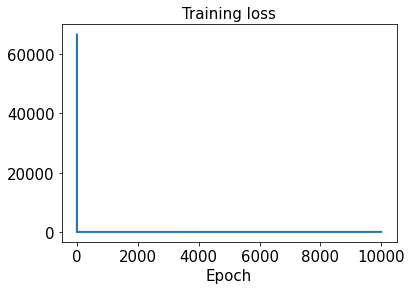

In [9]:
hist = history.history
plt.plot(hist['loss'], lw=2)
plt.title('Training loss', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

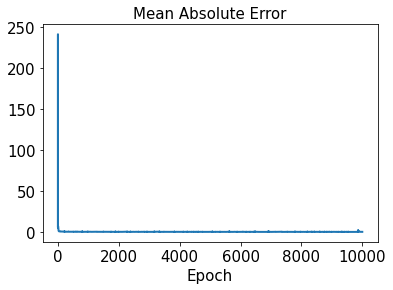

In [10]:
plt.plot(hist['mae'], lw=2)
plt.title('Mean Absolute Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [11]:
test_results = autoencoder.evaluate([x_test, tsr_test])

1/1 [==============================] - 0s 114ms/step - loss: 0.0050 - mae: 0.0000e+00 - mape: 0.0000e+00 - rmse: 0.0000e+00 - msle: 0.0000e+00


In [12]:
decoded_imgs = autoencoder.predict([x_test, tsr_test])

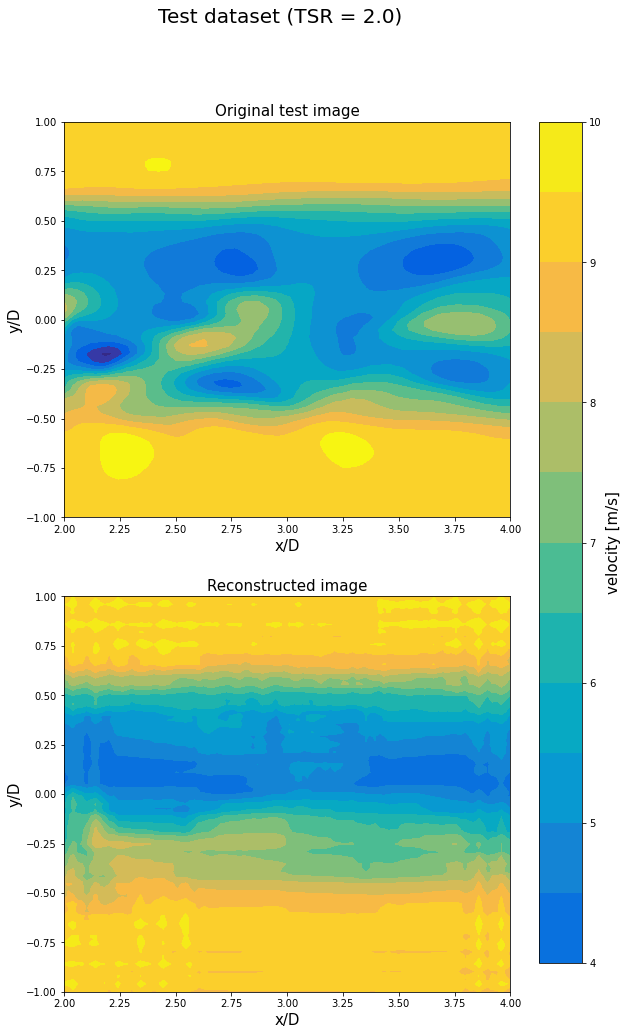

In [13]:
plt.figure(figsize=(8, 16))
xtest_rotate = x_test.T.reshape(100, 100)
decoded_rotate = decoded_imgs.T.reshape(100, 100)

cmap = plt.get_cmap(parula_map, 11)
xrange = np.linspace(-1, 1., 100)
yrange = np.linspace(2, 4, 100)
ymesh, xmesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(2, 1, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
a1 = plt.contourf(xmesh, ymesh, xtest_rotate.T, vmin=3, vmax=10, levels=11, cmap=cmap)
ax.set_xlabel('x/D', fontsize=15)
ax.set_ylabel('y/D', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(2, 1, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate.T, vmin=3, vmax=10, levels=11, cmap=cmap)
ax.set_xlabel('x/D', fontsize=15)
ax.set_ylabel('y/D', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)

cax = plt.axes([0.95, 0.15, 0.075, 0.73])
cbar = plt.colorbar(a2, cax=cax)
cbar.set_label('velocity [m/s]', fontsize=15)
cbar.set_ticks([3, 4, 5, 6, 7, 8, 9, 10])

plt.suptitle('Test dataset (TSR = 2.0)',fontsize=20)
plt.show()

In [14]:
error_test = np.abs(decoded_imgs - x_test) / x_test * 100
print(error_test)

[[[[ 8.512458  ]
   [ 3.8510554 ]
   [ 0.5688855 ]
   ...
   [ 0.31202123]
   [ 5.141205  ]
   [ 9.507881  ]]

  [[ 5.3856144 ]
   [ 1.5734258 ]
   [ 1.9534969 ]
   ...
   [ 0.5096606 ]
   [ 1.7490512 ]
   [ 4.3093586 ]]

  [[ 0.9375479 ]
   [ 0.74297404]
   [ 2.1233935 ]
   ...
   [ 1.5418537 ]
   [ 1.3639286 ]
   [ 0.35930613]]

  ...

  [[ 3.5613914 ]
   [ 0.7386036 ]
   [ 3.1448092 ]
   ...
   [ 3.3707805 ]
   [ 2.6346798 ]
   [ 1.8606514 ]]

  [[ 6.7860246 ]
   [ 2.454007  ]
   [ 1.6050439 ]
   ...
   [ 3.605493  ]
   [ 1.4074893 ]
   [ 2.2532706 ]]

  [[12.274538  ]
   [ 5.4318256 ]
   [ 0.4325178 ]
   ...
   [ 2.653273  ]
   [ 1.3050793 ]
   [ 6.941219  ]]]]


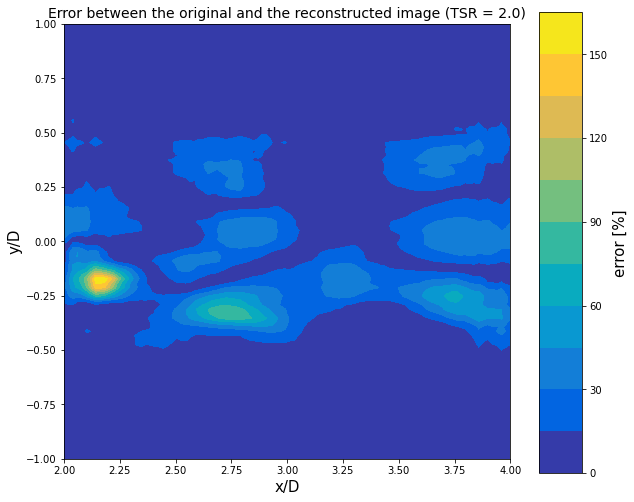

In [15]:
error_test_rotate = error_test.T.reshape(100, 100)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_rotate.T, levels=11, cmap=parula_map)
ax5.set_title('Error between the original and the reconstructed image (TSR = 2.0)', fontsize=14)
ax5.set_xlabel('x/D', fontsize=15)
ax5.set_ylabel('y/D', fontsize=15)

cax = plt.axes([0.95, 0.1, 0.075, 0.8])
cbar = plt.colorbar(mappable, cax=cax)
cbar.set_label('error [%]', fontsize=15)

plt.show()

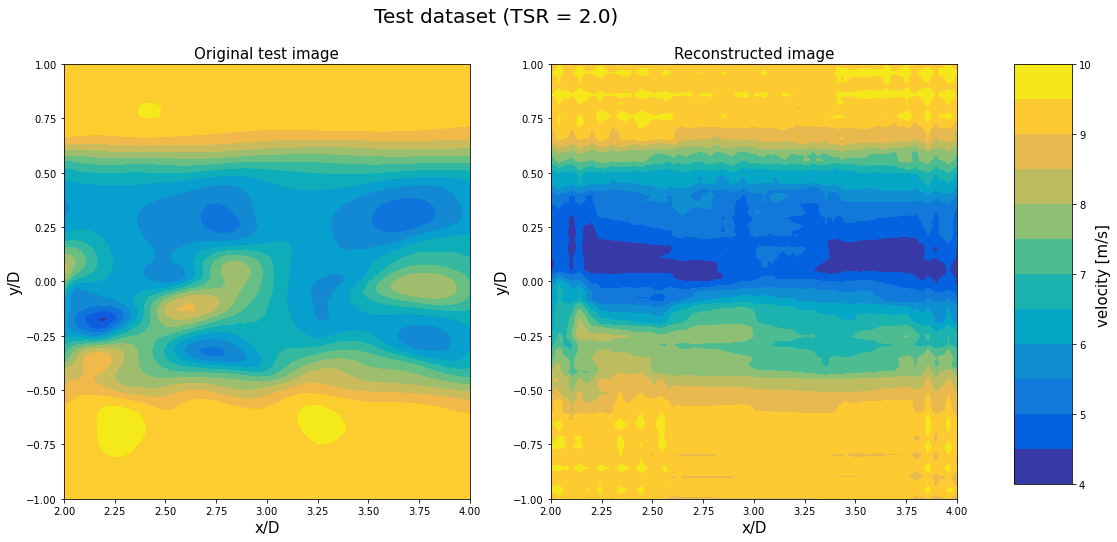

In [16]:
plt.figure(figsize=(16, 8))
xtest_rotate2 = x_test.T.reshape(100, 100)
decoded_rotate2 = decoded_imgs.T.reshape(100, 100)

cmap = plt.get_cmap(parula_map, 11)
xrange = np.linspace(-1, 1., 100)
yrange = np.linspace(2, 4, 100)
ymesh, xmesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(1, 2, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
plt.contourf(xmesh, ymesh, xtest_rotate2.T, levels=11, cmap=cmap)
ax.set_xlabel('x/D', fontsize=15)
ax.set_ylabel('y/D', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
plt.contourf(xmesh, ymesh, decoded_rotate2.T, levels=11, cmap=cmap)
ax.set_xlabel('x/D', fontsize=15)
ax.set_ylabel('y/D', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)

cax = plt.axes([0.95, 0.15, 0.05, 0.73])
cbar = plt.colorbar(cax=cax)
cbar.set_label('velocity [m/s]', fontsize=15)

plt.suptitle('Test dataset (TSR = 2.0)',fontsize=20)
plt.show()

In [17]:
train0 = x_train[0].reshape(1, 100, 100, 1)
train_decode0 = autoencoder.predict([train0, tsr_train[0]]).reshape(100, 100)
print(train_decode0.shape)

(100, 100)


In [18]:
train0_orig = x_train[0].reshape(100, 100)

In [19]:
error_train0 = np.abs(train_decode0 - train0_orig) / train0_orig * 100

In [20]:
print(error_train0)

[[ 7.4121885   2.6953511   1.6667078  ...  0.8546554   4.172528
   8.582304  ]
 [ 4.183927    0.30755877  3.1632915  ...  1.7664207   0.65365636
   3.2658346 ]
 [ 0.19412866  1.8913361   3.2127666  ...  2.7948587   2.4099083
   1.3733418 ]
 ...
 [ 2.2935233   0.8087377   5.0137916  ...  2.1629977   1.1220556
   0.30314964]
 [ 5.5761847   0.9871821   3.2569673  ...  2.5876029   0.03017559
   3.844478  ]
 [11.15265     4.1166973   1.044943   ...  1.7163988   2.5961664
   8.506947  ]]


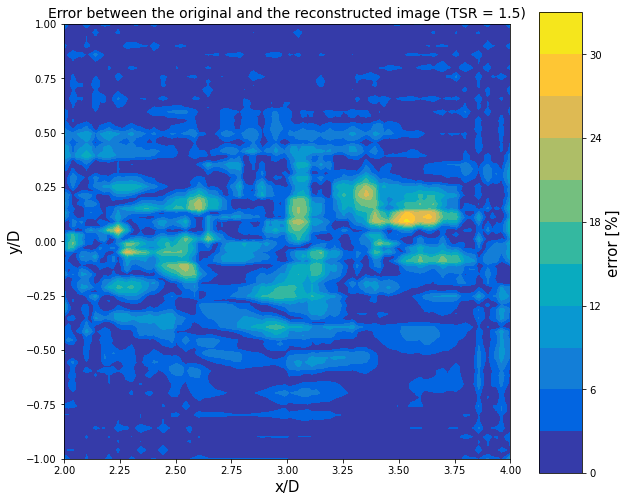

In [21]:
error_train0_rotate = error_train0.T.reshape(100, 100)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_train0_rotate.T, levels=11, cmap=parula_map)
ax5.set_title('Error between the original and the reconstructed image (TSR = 1.5)', fontsize=14)
ax5.set_xlabel('x/D', fontsize=15)
ax5.set_ylabel('y/D', fontsize=15)

cax = plt.axes([0.95, 0.1, 0.075, 0.8])
cbar = plt.colorbar(mappable, cax=cax)
cbar.set_label('error [%]', fontsize=15)

plt.show()

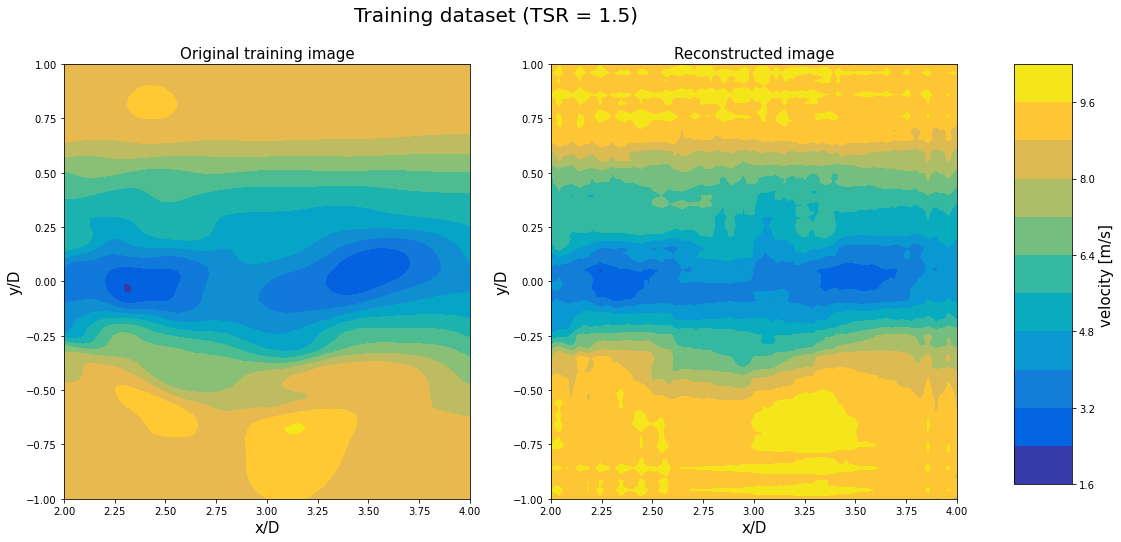

In [22]:
plt.figure(figsize=(16, 8))
#xtest_rotate2 = x_test.T.reshape(100, 100)
#decoded_rotate2 = decoded_imgs.T.reshape(100, 100)

cmap = plt.get_cmap(parula_map, 11)
xrange = np.linspace(-1, 1., 100)
yrange = np.linspace(2, 4, 100)
ymesh, xmesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(1, 2, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
plt.contourf(xmesh, ymesh, train0_orig, levels=11, cmap=cmap)
ax.set_xlabel('x/D', fontsize=15)
ax.set_ylabel('y/D', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original training image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
plt.contourf(xmesh, ymesh, train_decode0, levels=11, cmap=cmap)
ax.set_xlabel('x/D', fontsize=15)
ax.set_ylabel('y/D', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)

cax = plt.axes([0.95, 0.15, 0.05, 0.73])
cbar = plt.colorbar(cax=cax)
cbar.set_label('velocity [m/s]', fontsize=15)

plt.suptitle('Training dataset (TSR = 1.5)',fontsize=20)
plt.show()

In [23]:
print(np.mean(error_train0))

3.9748473


In [24]:
print(np.max(error_train0))

30.950932


In [25]:
print(np.mean(error_test))

10.958039


In [26]:
print(np.max(error_test))

158.28043
